In [41]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import ddm3d as ddm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<h1>Calculate Stress

In [2]:
Sxx = 80
Syy = 60
ang = 45
cos_theta = np.cos(np.deg2rad(ang))
cos_theta_sq = np.cos(np.deg2rad(ang))**2
sin_theta = np.sin(np.deg2rad(ang))
sin_theta_sq = np.sin(np.deg2rad(ang))**2
print('Sxx_30 = ' + str(Sxx*cos_theta_sq+Syy*sin_theta_sq))
print('Syy_30 = ' + str(Sxx*sin_theta_sq+Syy*cos_theta_sq))
print('T_30 = ' + str((Syy-Sxx)*sin_theta*cos_theta))

Sxx_30 = 70.0
Syy_30 = 70.0
T_30 = -10.0


<h1>Create virtual fibres

In [3]:
fibre1 = ddm.make_fibre(start=(50,10,-100),end=(50,10,100),n_chn=200) #fibre parallel to the fracture
fibre2 = ddm.make_fibre(start=(50,50,-100),end=(50,50,100),n_chn=200) #fibre parallel to the fracture
fibre3 = ddm.make_fibre(start=(50,-100,50),end=(50,100,50),n_chn=200) #fibre across above the fracture
fibre4 = ddm.make_fibre(start=(50,100,0),end=(50,-100,0),n_chn=200) #fibre across the fracture

plane_xz = ddm.make_plane(center=(50,0,0),size=(200,200),node_size=(5,5),orientation='XZ')
plane_xy = ddm.make_plane(center=(50,0,0),size=(200,200),node_size=(5,5),orientation='XY')

<h1> Assume growth profiles for fracture length and height

In [4]:
a = np.linspace(1,60,60)
a1 = np.linspace(1,60,30)
b = np.linspace(0.1,10,60)
c = np.linspace(0.1,10,30)
d = np.linspace(0.1,5,30)
e = np.linspace(0,100,30)
f = np.linspace(0,100,90)
# tot_l_1 = 82*np.arctan(a)
tot_l_1 = 20*np.sqrt(a)
tot_h_1 = 10*np.sqrt(a)
dl_1 = 2*np.sqrt(a)
dh_1 = 1*np.sqrt(a)
# dl_1 = np.ones(60)*5.0
# dh_1 = np.ones(60)*5.0
# tot_l_1 = 20*a
# tot_h_1 = 10*a
# dl_1 = 2*a
# dh_1 = 5*a
# dl_1 = 5
# dh_1 = 1

c_x_1 = 0
c_y_1 = -(50)*np.tan(np.deg2rad(30)) #(50.0 - 2*a)*np.tan(np.deg2rad(30))
# c_y_1 = 0

tot_l_2 = 120
tot_h_2 = 50
dl_2 = 120/40
dh_2 = 50/4

# tot_l_2 = 15*np.sqrt(a1)
# tot_h_2 = 7.5*np.sqrt(a1)
# dl_2 = 0.5*np.sqrt(a1)
# dh_2 = 2*np.sqrt(a1)

# c_x_2 = 50.0 + 100*np.arctan(a)
# c_y_2 = (0.0 - 100*np.arctan(a))*np.tan(np.deg2rad(30))

c_x_2 = 0
c_y_2 = -(50)*np.tan(np.deg2rad(30))
# c_y_2 = 0

# ssl1 = np.zeros(30)
ssl1 = np.zeros(60)
snn1 = 0.8e6*np.arctan(b)
# ssl2 = np.linspace(0,1e6,30)
ssl2 = -1.0e6*np.exp(0.01*e)+1.0e6
# ssl2 = -1.0e6*np.exp(-1*c)+1e6
snn2 = snn1[-1]*np.exp(-1*c)

eff_ss1 = np.linspace(0,1e6,30)
eff_ss3 = np.linspace(1e6,2e5,31)
# eff_ss1 = 65e6-2e6*e
# eff_ss2 = eff_ss1[-1] + 2e6*e
# eff_ss2 = eff_ss1[-1] * np.ones(30)

snn3 = np.concatenate((snn1,snn2))
# ssl3 = np.concatenate((ssl1,ssl2))
tot_l_3 = np.concatenate((tot_l_1,np.ones(30)*tot_l_1[-1]))
tot_h_3 = np.concatenate((tot_h_1,np.ones(30)*tot_h_1[-1]))
dl_3 = np.concatenate((dl_1,np.ones(30)*dl_1[-1]))
dh_3 = np.concatenate((dh_1,np.ones(30)*dh_1[-1]))
eff_ss = np.concatenate((eff_ss1,eff_ss3[1:]))
eff_ss2 = 1e6*np.ones(60)
ss = -np.concatenate((ssl1,ssl2))
# ss2 = -snn3
# ss = ssl2

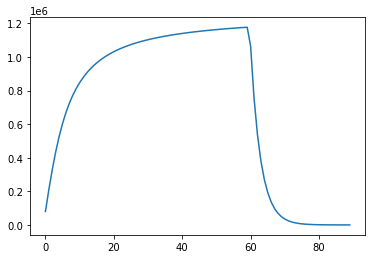

In [5]:
plt.plot(snn3)

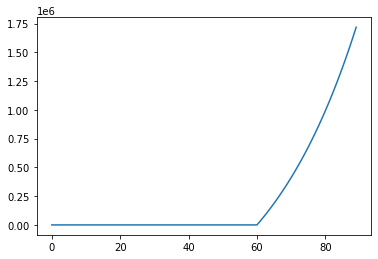

In [6]:
plt.plot(ss)

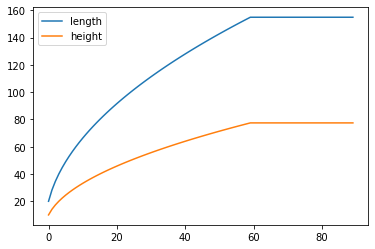

In [7]:
plt.plot(tot_l_3,label='length')
plt.plot(tot_h_3,label='height')
plt.legend()

In [8]:
print(dl_3)

[ 2.          2.82842712  3.46410162  4.          4.47213595  4.89897949
  5.29150262  5.65685425  6.          6.32455532  6.63324958  6.92820323
  7.21110255  7.48331477  7.74596669  8.          8.24621125  8.48528137
  8.71779789  8.94427191  9.16515139  9.38083152  9.59166305  9.79795897
 10.         10.19803903 10.39230485 10.58300524 10.77032961 10.95445115
 11.13552873 11.3137085  11.48912529 11.66190379 11.83215957 12.
 12.16552506 12.32882801 12.489996   12.64911064 12.80624847 12.9614814
 13.11487705 13.26649916 13.41640786 13.56465997 13.7113092  13.85640646
 14.         14.14213562 14.28285686 14.4222051  14.56021978 14.69693846
 14.83239697 14.96662955 15.09966887 15.23154621 15.3622915  15.49193338
 15.49193338 15.49193338 15.49193338 15.49193338 15.49193338 15.49193338
 15.49193338 15.49193338 15.49193338 15.49193338 15.49193338 15.49193338
 15.49193338 15.49193338 15.49193338 15.49193338 15.49193338 15.49193338
 15.49193338 15.49193338 15.49193338 15.49193338 15.49193338

In [37]:
# mixed mode
growing_fracture = []
for i in range(0,60):
    growing_fracture.append([ddm.make_fracture_ellipse(tot_l_3[i],tot_h_3[i],dl_3[i],dh_3[i],c_x_1,c_y_1,0.0,-30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,snn3[i])])
for i in range(60,90):
    growing_fracture.append([ddm.make_fracture_ellipse(tot_l_3[i],tot_h_3[i],dl_3[i],dh_3[i],c_x_1,c_y_1,0.0,-30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,snn3[i]),
                             ddm.make_fracture_ellipse(tot_l_3[-1],tot_h_3[-1],dl_3[-1],dh_3[-1],c_x_1,c_y_1,0.0,-30.0,0.0,0.0,0.0,0.0,0.0,ss[i],0.0,0.0)])

In [78]:
# mixed mode
growing_fracture = []
for i in range(0,90):
    growing_fracture.append([ddm.make_fracture(tot_l_3[i],tot_h_3[i],dl_3[i],dh_3[i],c_x_1,c_y_1,0.0,-30.0,0.0,0.0,0.0,0.0,0.0,ss[i],0.0,snn3[i])])

In [139]:
# only shear mode
growing_fracture = []
for i in range(0,30):
    growing_fracture.append([ddm.make_fracture(tot_l_2,tot_h_2,dl_2,dh_2,c_x_1,c_y_1,0.0,-30.0,0.0,0.0,0.0,0.0,0.0,ssl2[i],0.0,0.0)])

In [85]:
# only opening mode
growing_fracture = []
for i in range(0,90):
    growing_fracture.append([ddm.make_fracture(tot_l_3[i],tot_h_3[i],dl_3[i],dh_3[i],c_x_1,c_y_1,0.0,-30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,snn3[i])])

In [8]:
# only opening mode base case
growing_fracture = []
for i in range(0,90):
    growing_fracture.append([ddm.make_fracture(tot_l_3[i],tot_h_3[i],dl_3[i],dh_3[i],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,snn3[i])])

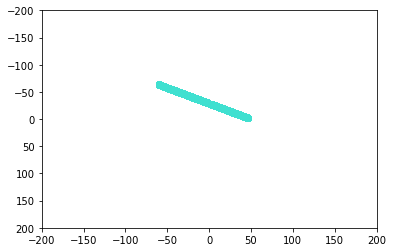

In [6]:
# fracture_plot_location(growing_fracture[2][0])
for i in range(0,60):
    ddm.fracture_plot_location(growing_fracture[i][0],i,save=False)

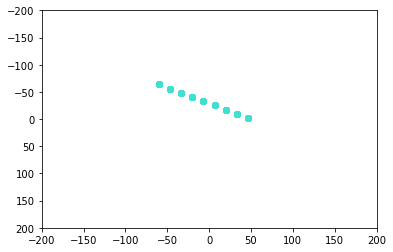

In [7]:
ddm.fracture_plot_location(growing_fracture[60][0],1,save=False)

<h1>Calculate fibre response using DDM

In [86]:
from tqdm import tqdm
respara = {'ShearModulus': 25e9, 
           'PoissonRatio': 0.25}
for fractures in tqdm(growing_fracture):
    ddm.cal_dd(fractures,respara)

  0%|                                                    | 0/90 [00:00<?, ?it/s]/Users/chaoyiwang/My Drive/Calgary Postdoc/DDM/ddm3d.py:271: RuntimeWarning: divide by zero encountered in double_scalars
  J3 = -np.arctan((x1-a)*(x2-b)/(x3*r1))+np.arctan((x1-a)*(x2+b)/(x3*r2))+\
/Users/chaoyiwang/My Drive/Calgary Postdoc/DDM/ddm3d.py:272: RuntimeWarning: divide by zero encountered in double_scalars
  np.arctan((x1+a)*(x2-b)/(x3*r3))-np.arctan((x1+a)*(x2+b)/(x3*r4))
100%|███████████████████████████████████████████| 90/90 [01:12<00:00,  1.23it/s]


In [ ]:
for fractures in tqdm(growing_fracture):
    ddm.cal_stress_disp(fractures,respara,fibre1)
    ddm.cal_stress_disp(fractures,respara,fibre2)
#     ddm.cal_stress_disp(fractures,respara,fibre3)
    ddm.cal_stress_disp(fractures,respara,fibre4)

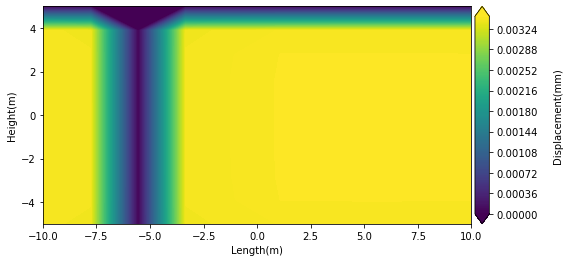

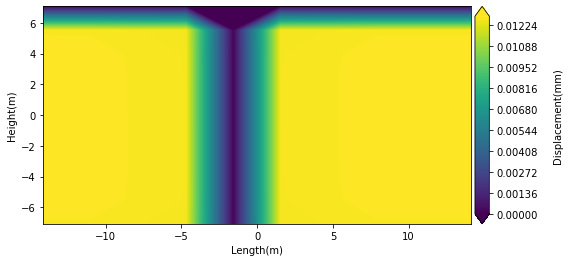

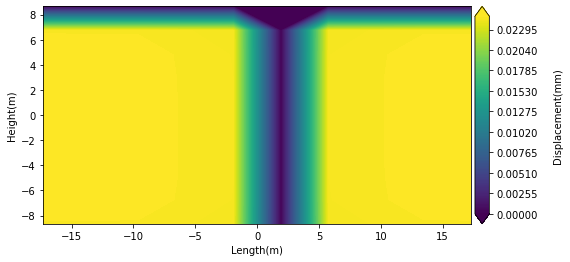

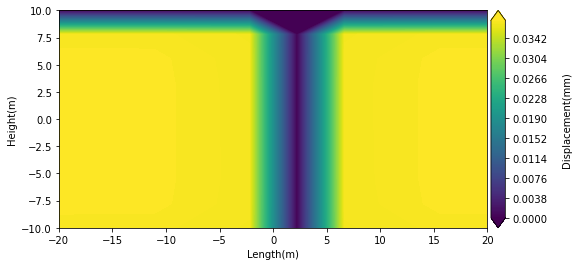

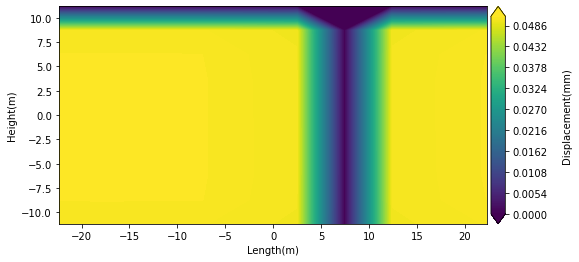

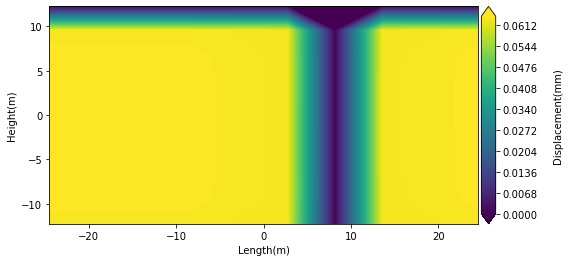

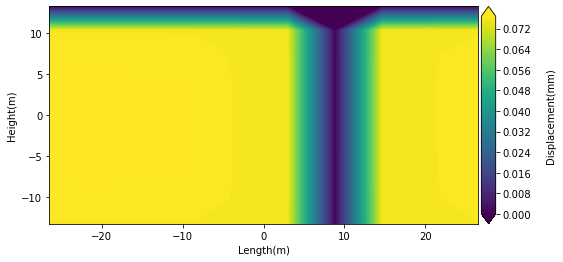

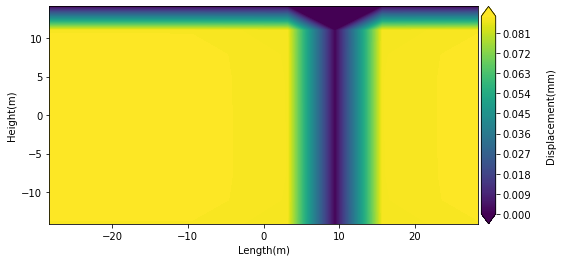

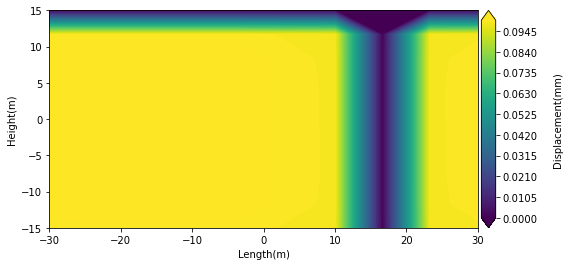

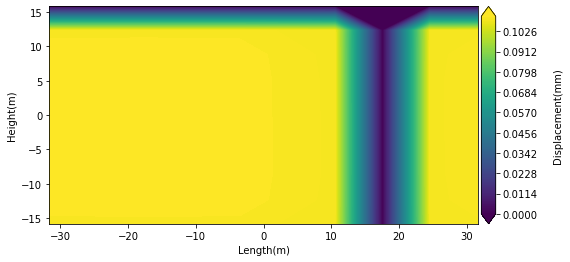

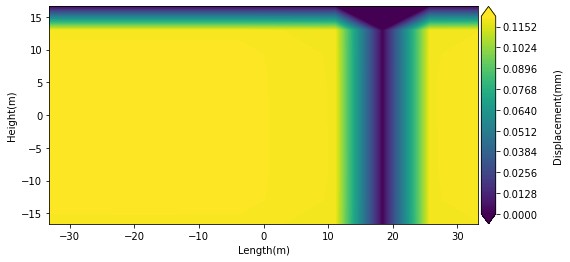

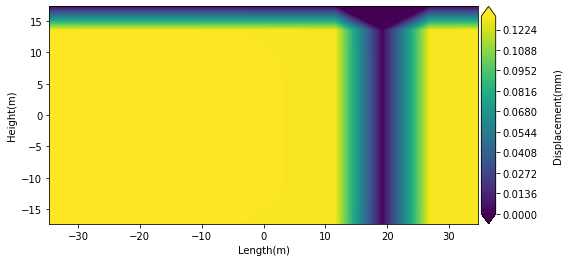

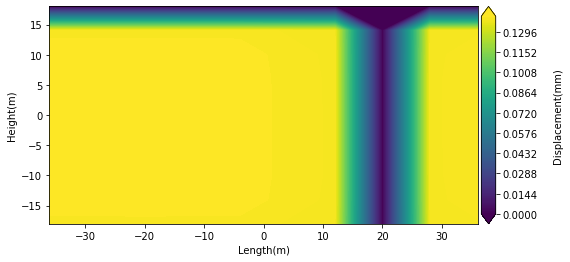

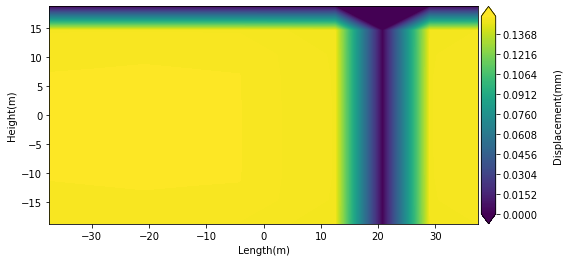

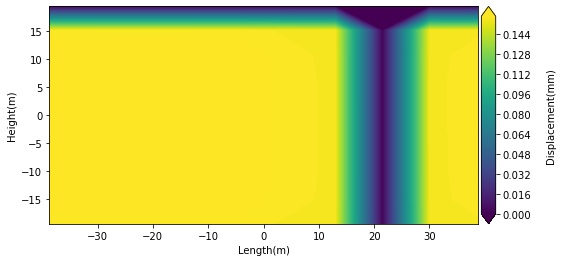

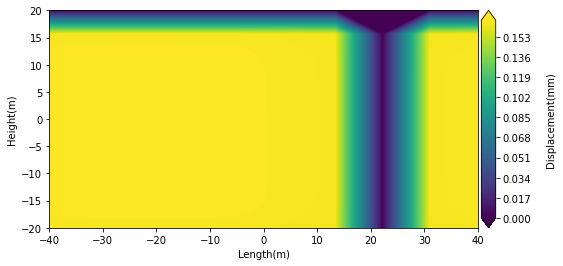

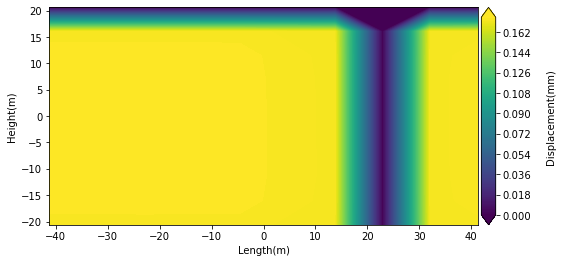

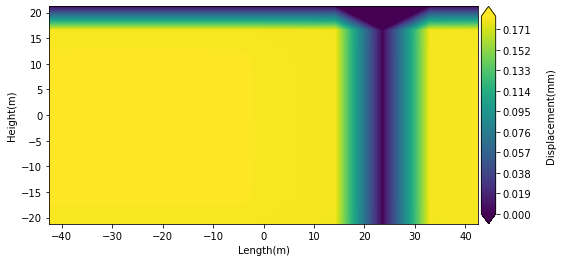

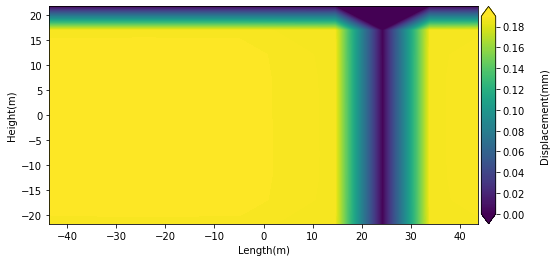

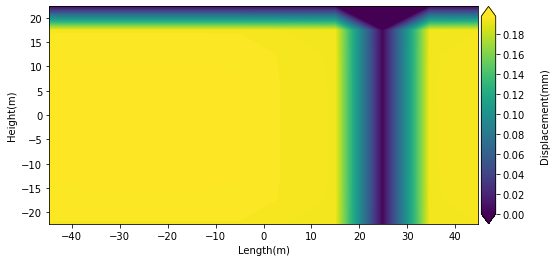

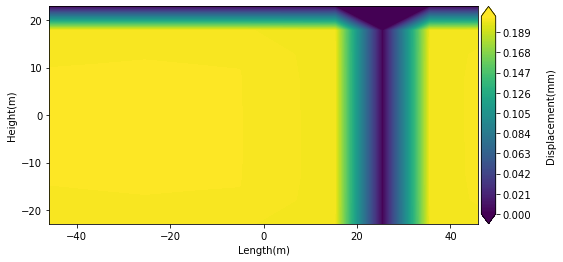

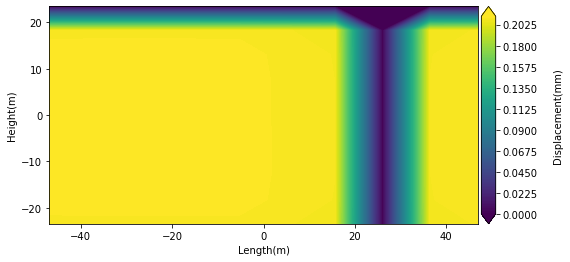

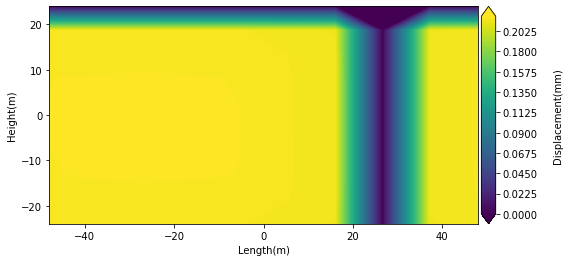

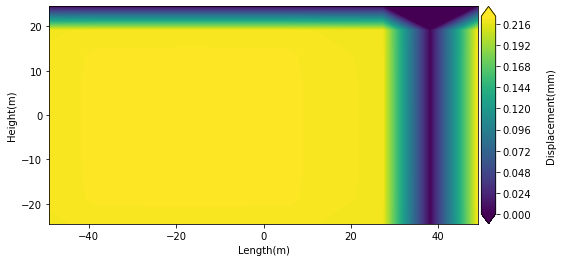

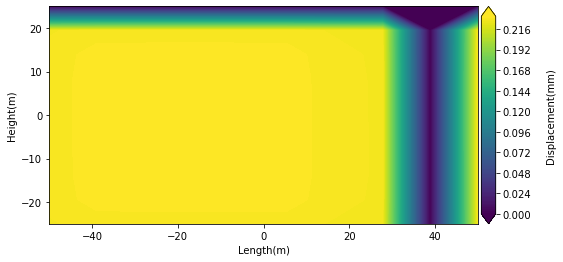

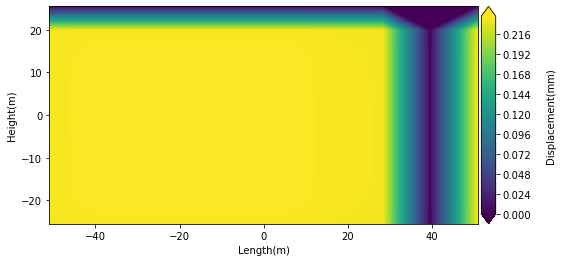

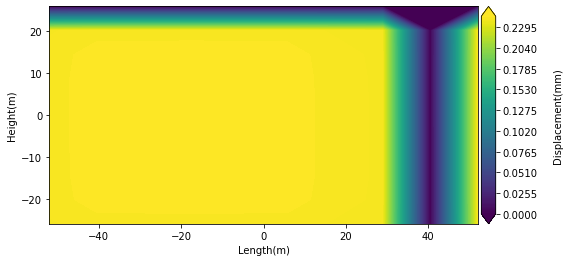

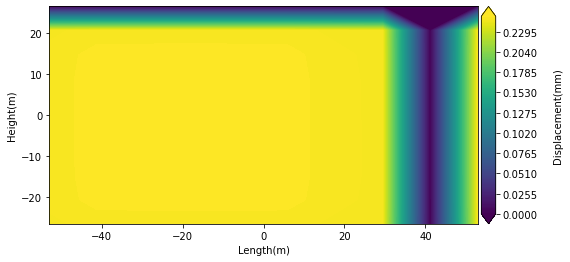

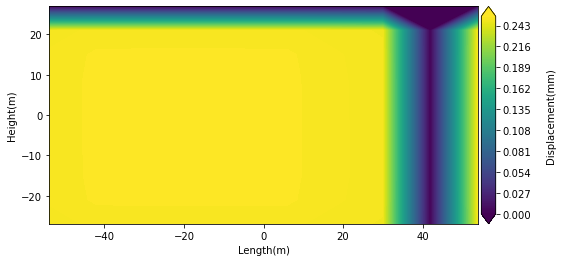

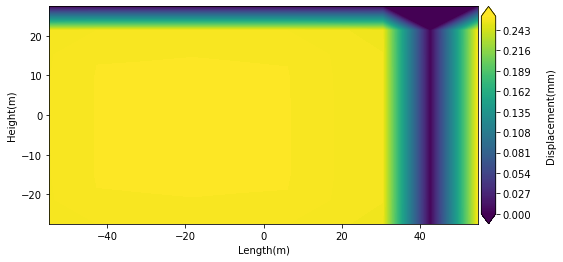

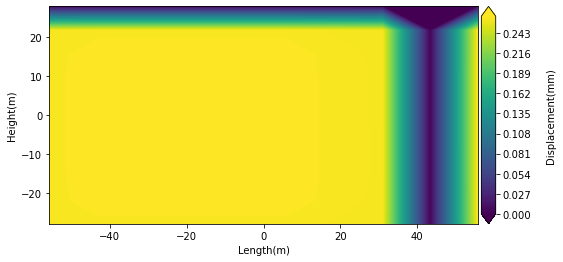

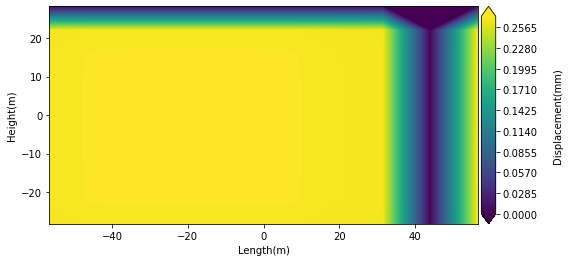

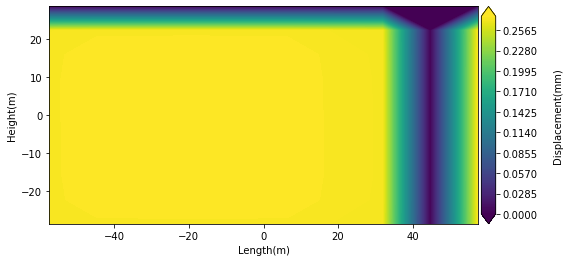

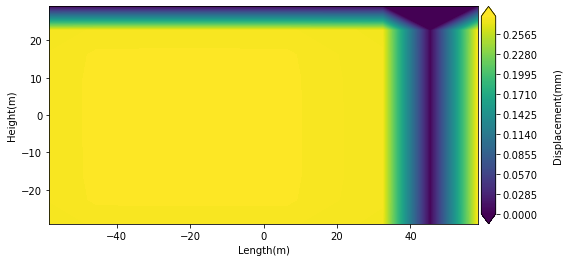

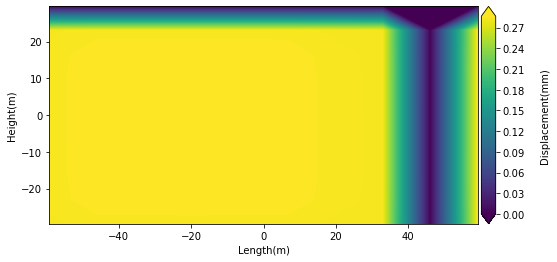

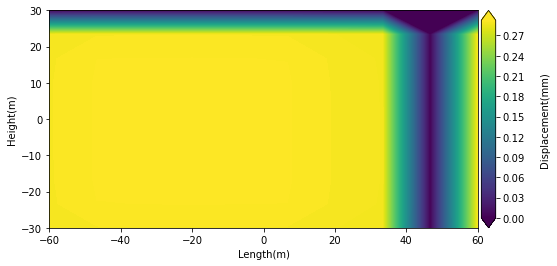

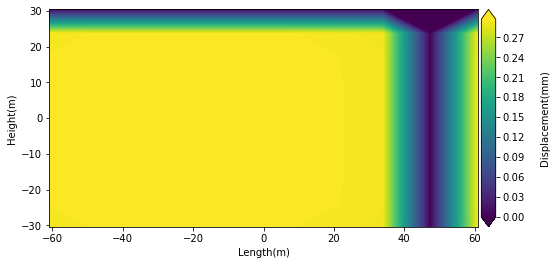

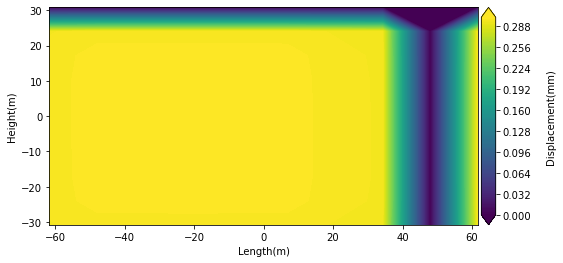

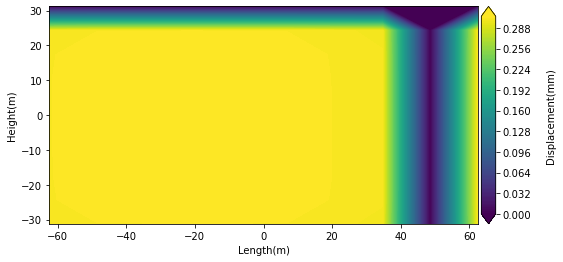

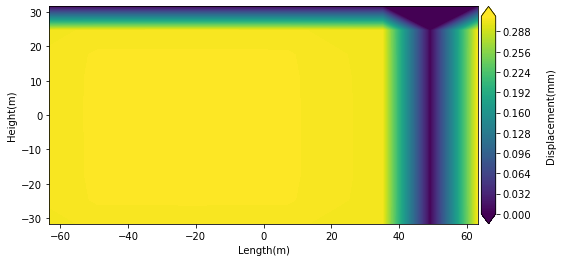

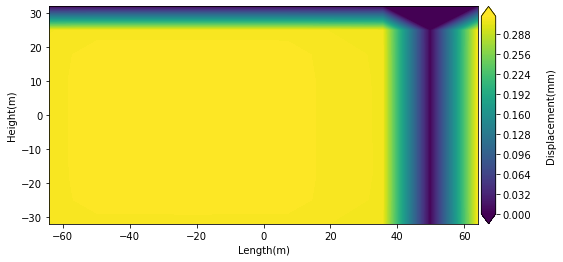

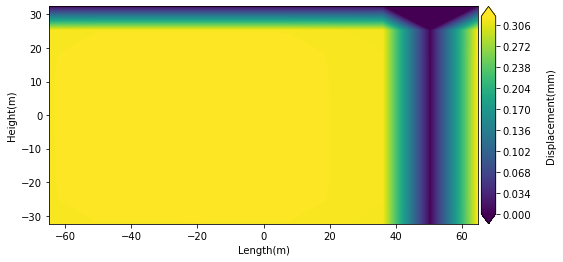

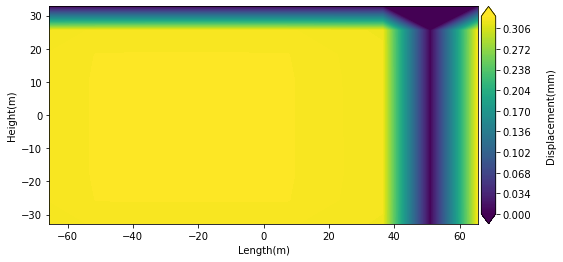

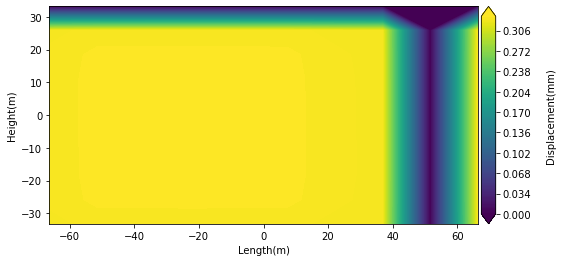

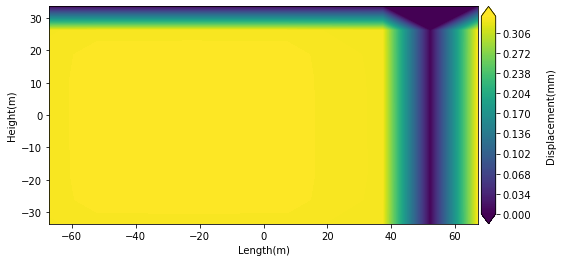

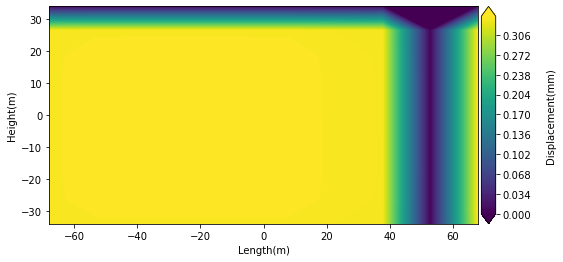

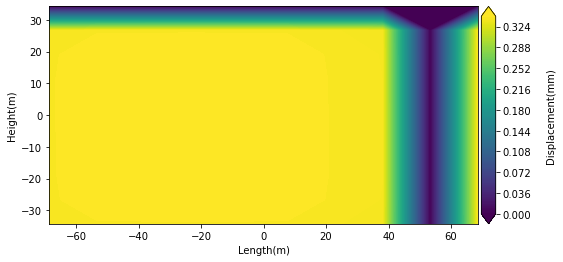

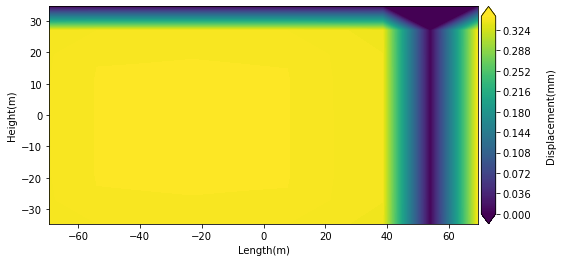

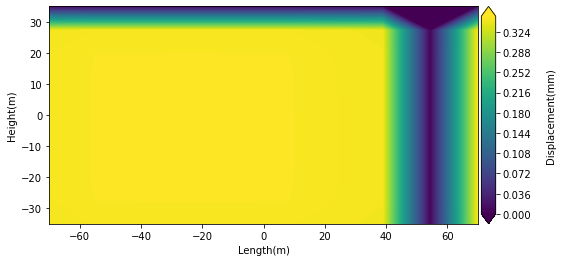

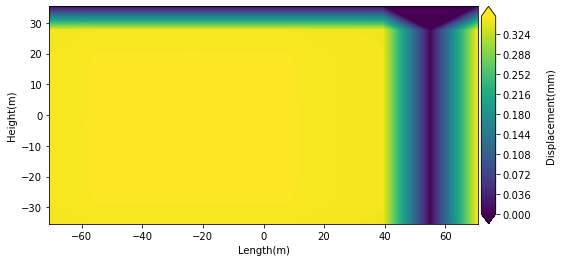

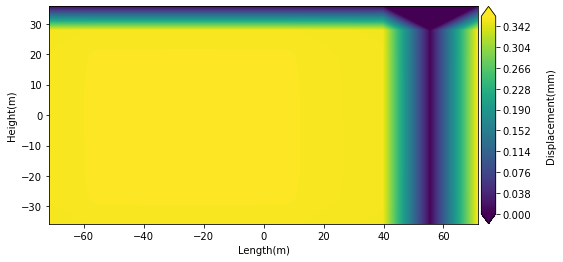

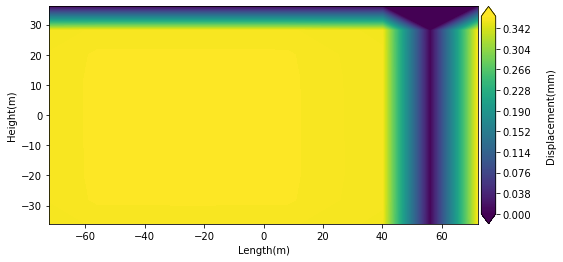

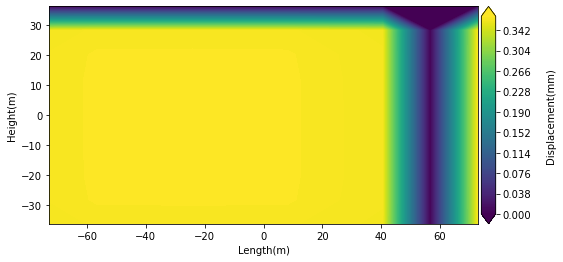

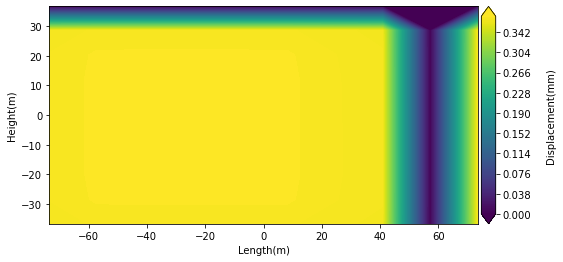

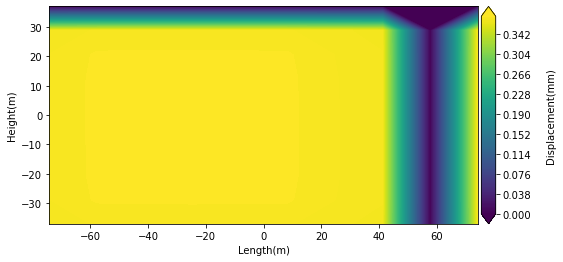

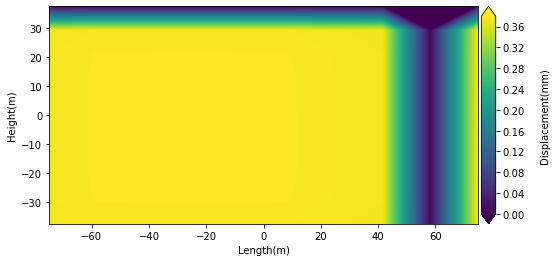

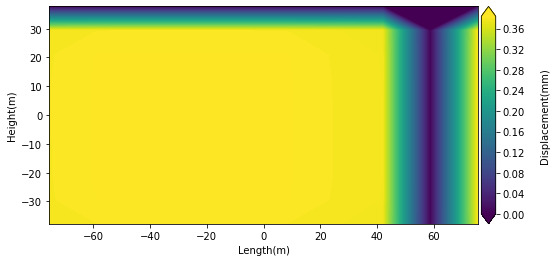

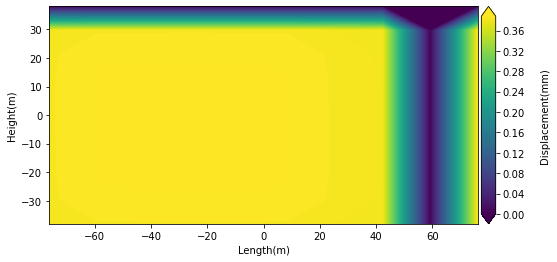

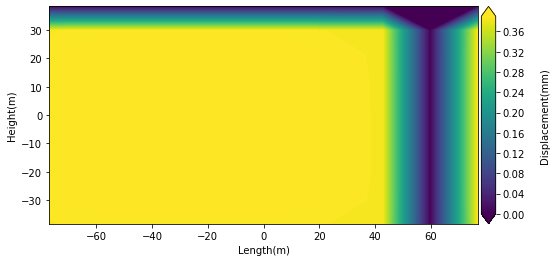

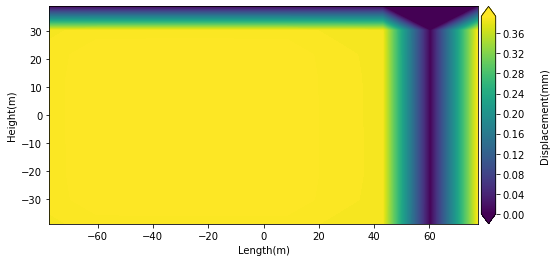

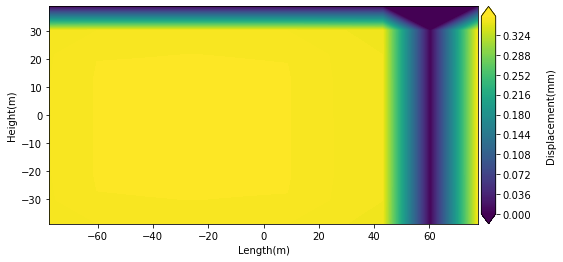

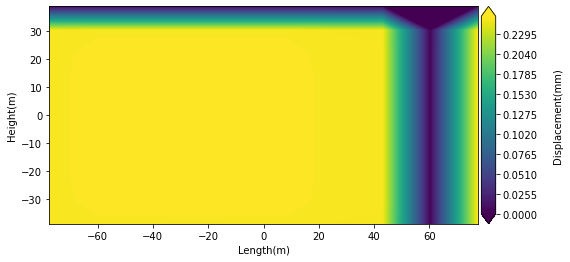

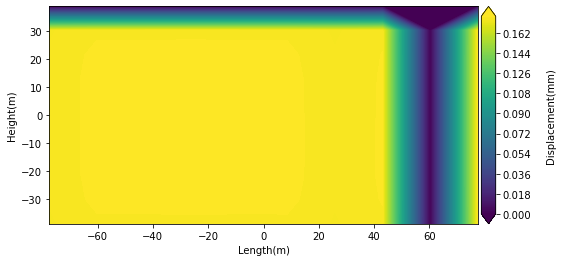

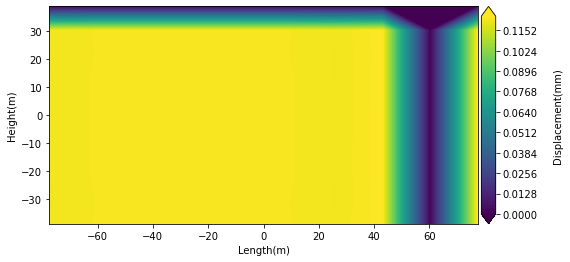

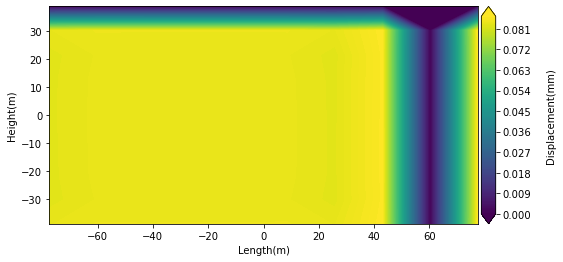

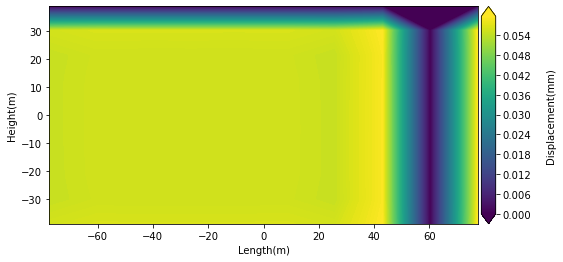

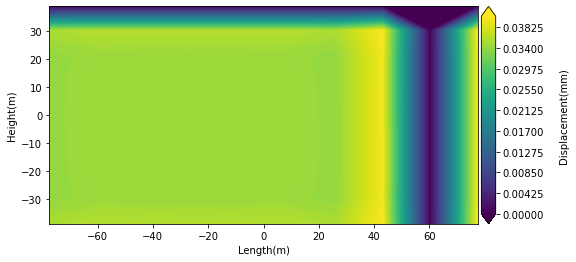

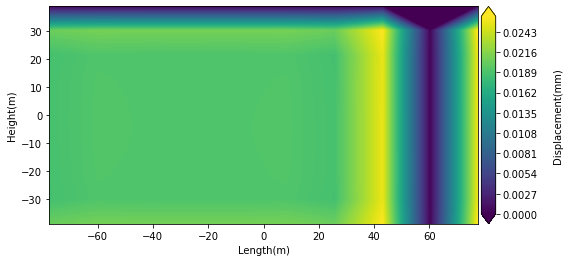

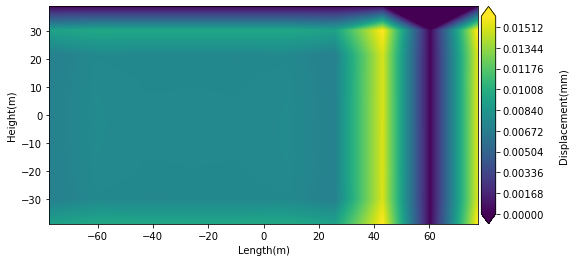

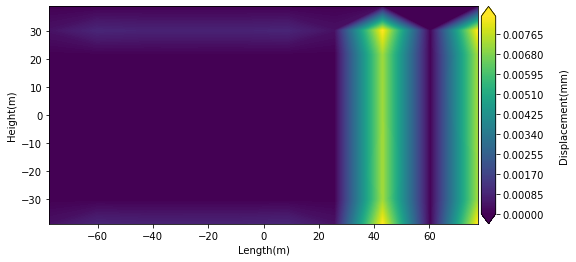

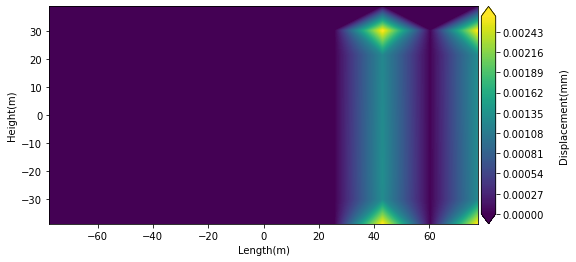

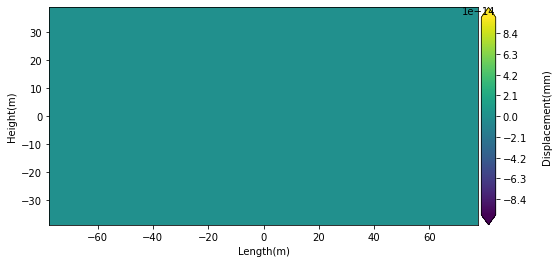

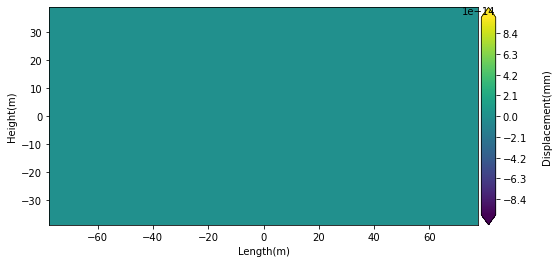

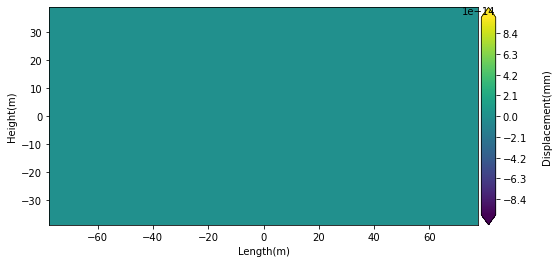

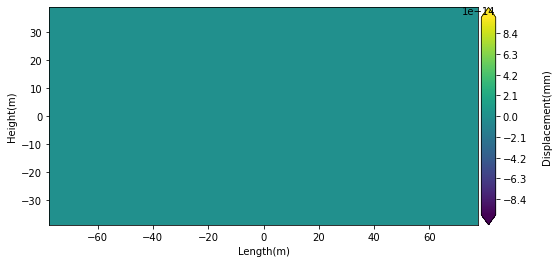

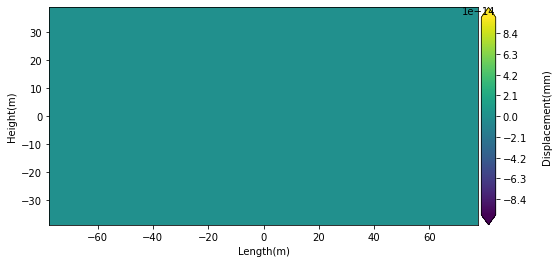

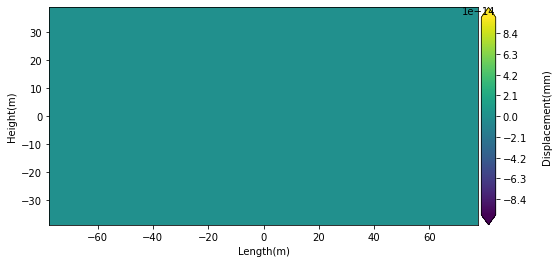

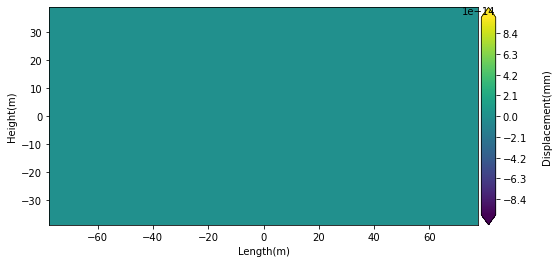

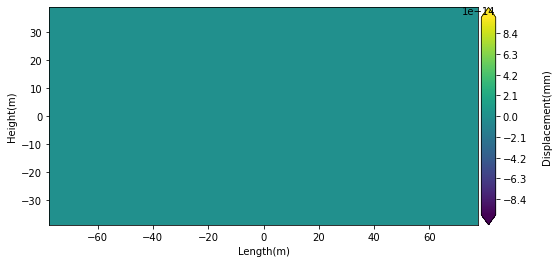

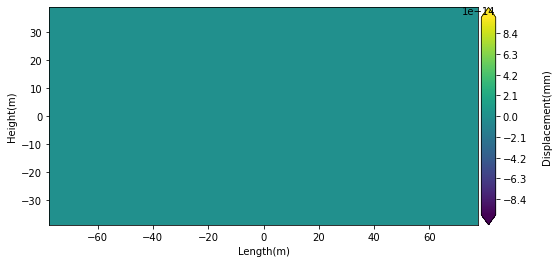

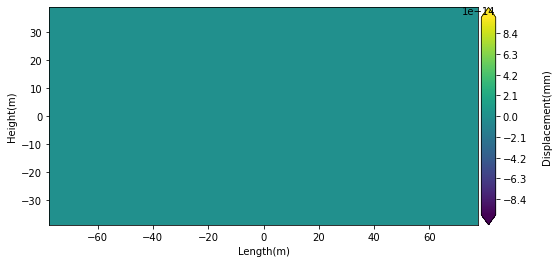

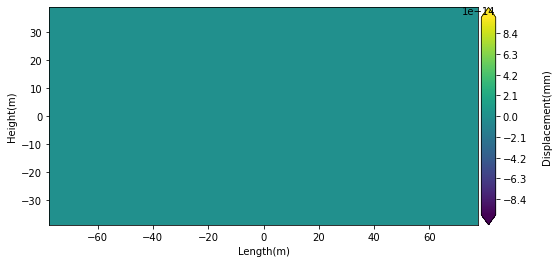

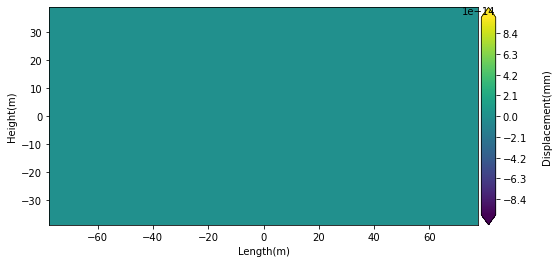

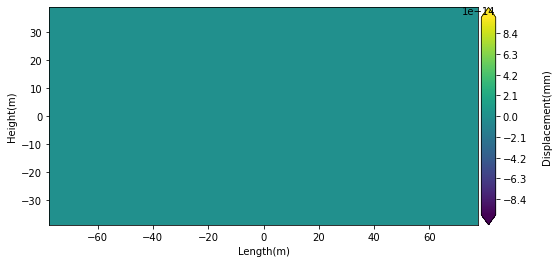

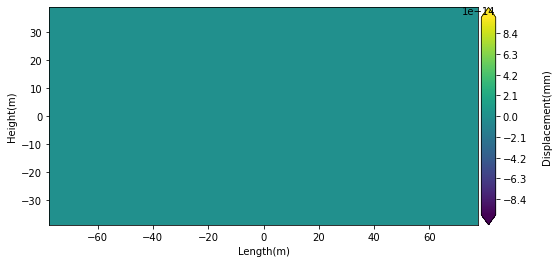

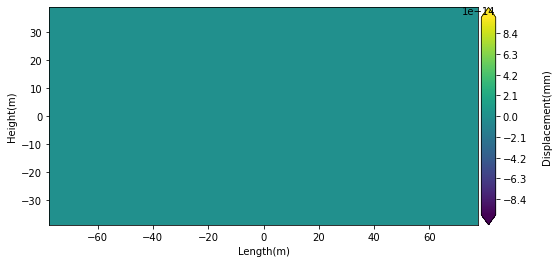

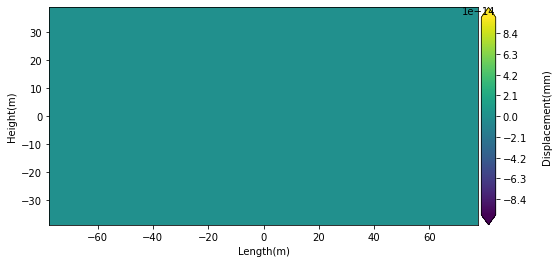

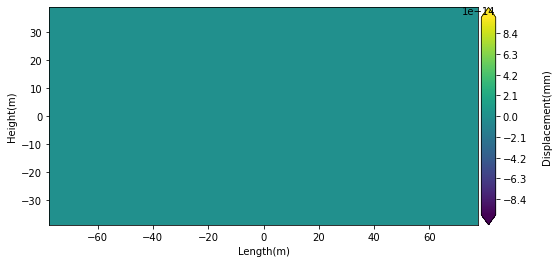

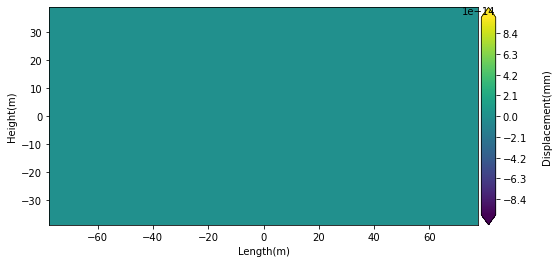

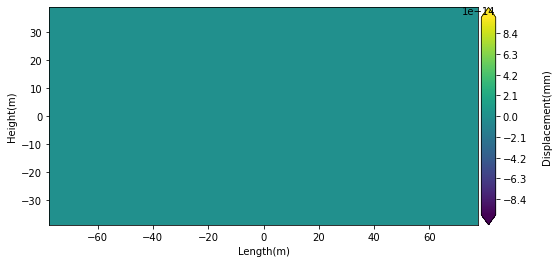

In [9]:
# strike = 0
for i, fracture in enumerate(growing_fracture):
    ddm.fracture_plot_disp(fracture[0],tot_l_3[i],tot_h_3[i],0.0,0.0,0.0,opt=2)

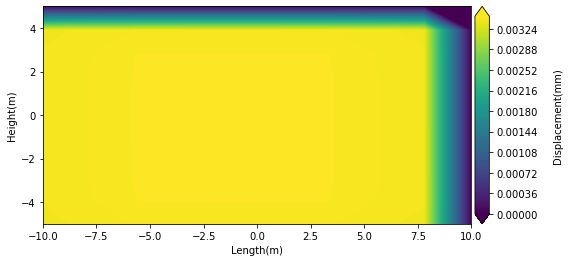

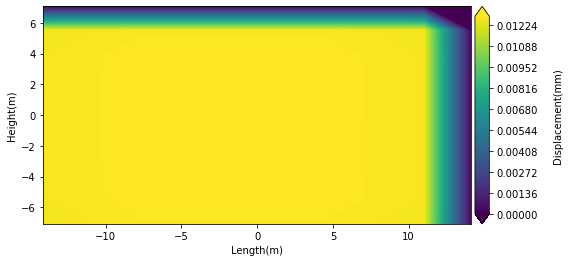

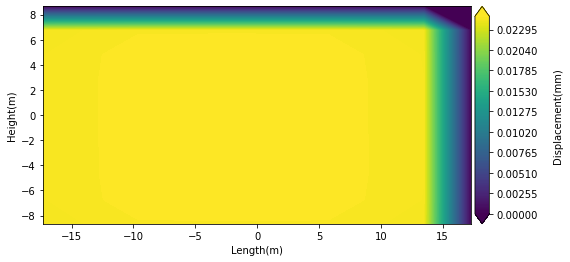

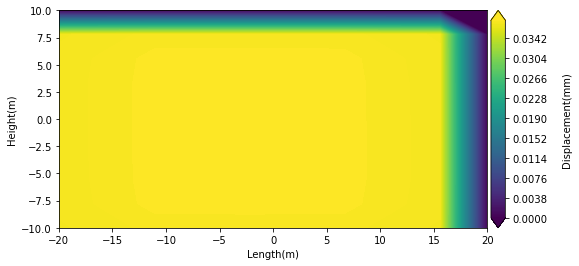

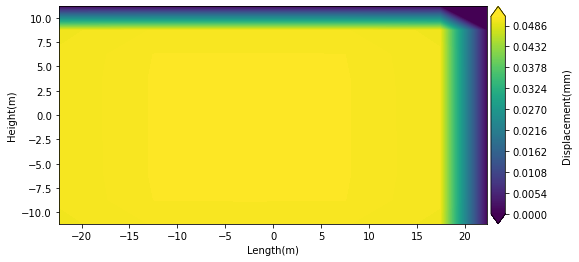

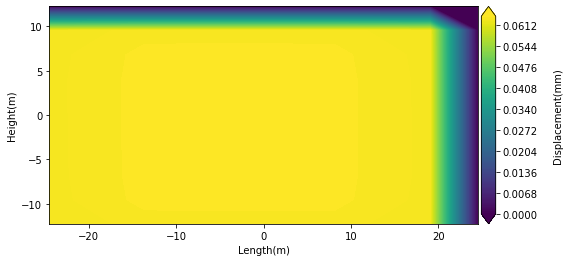

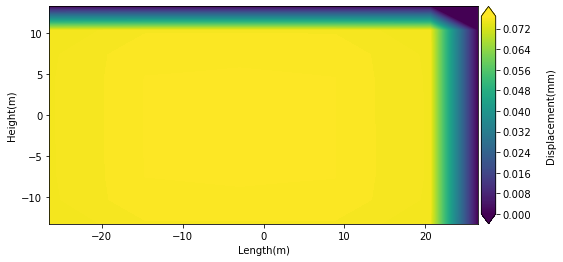

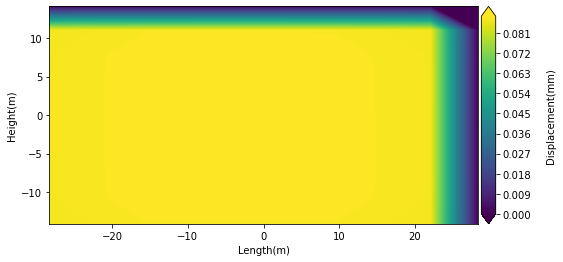

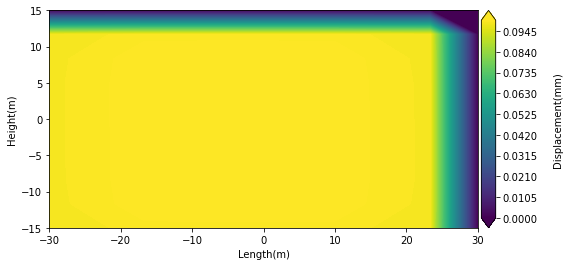

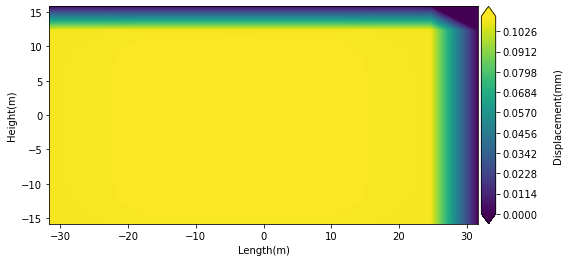

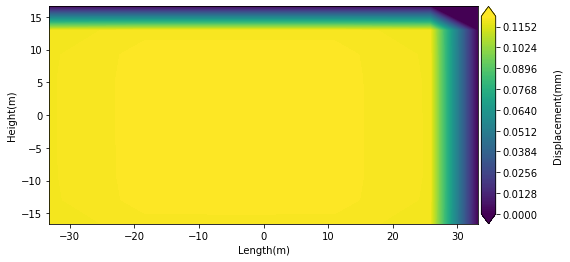

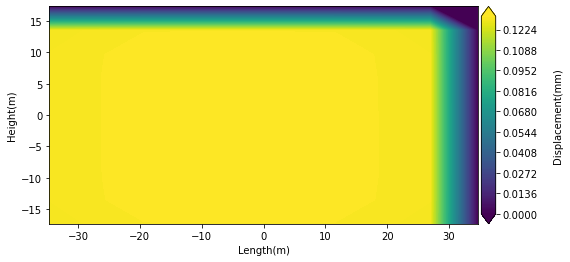

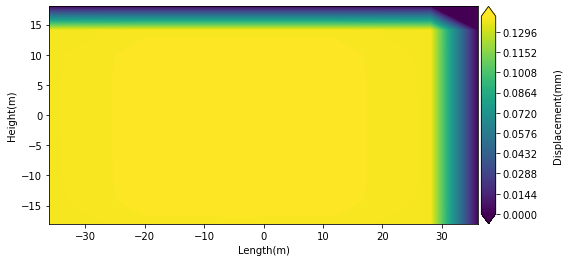

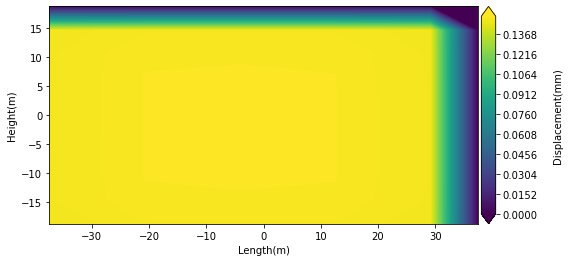

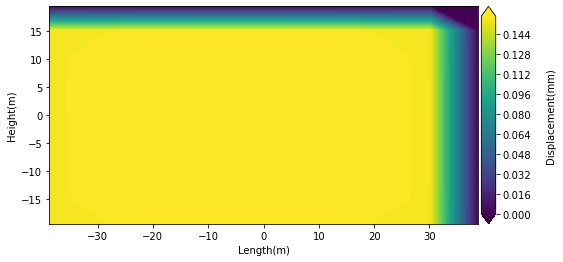

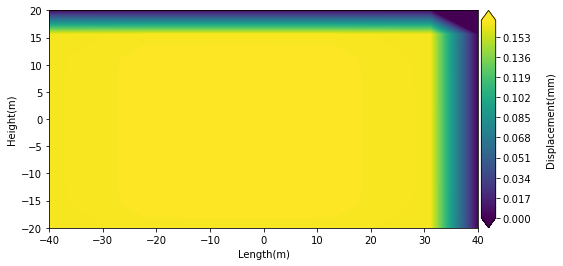

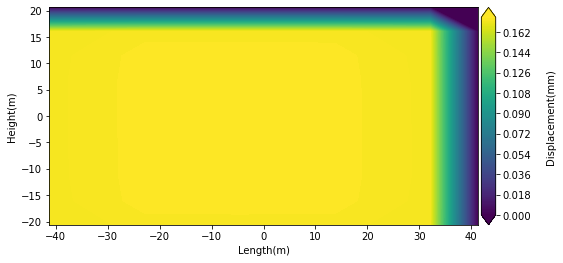

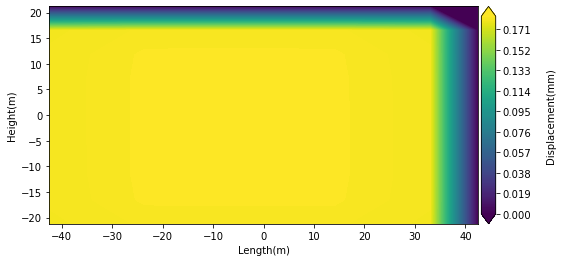

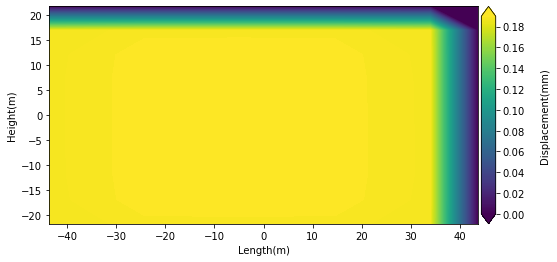

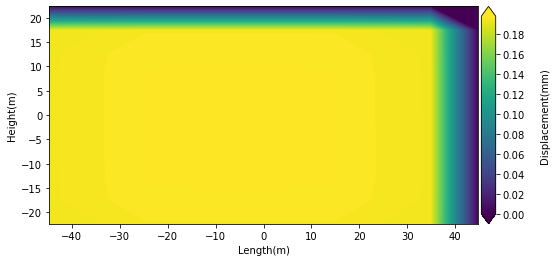

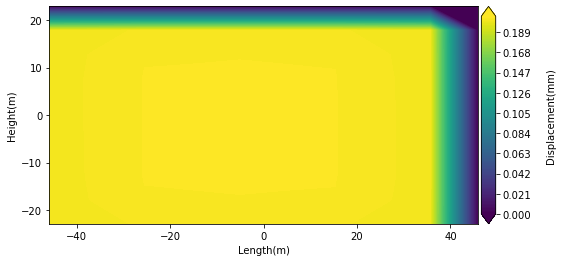

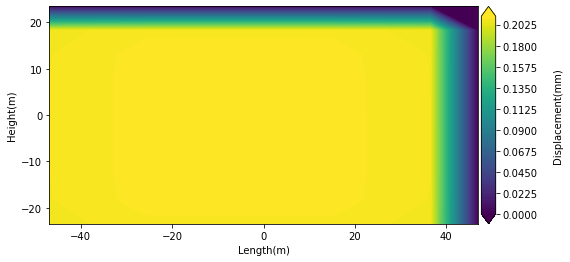

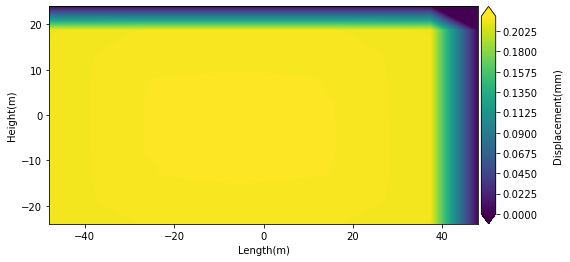

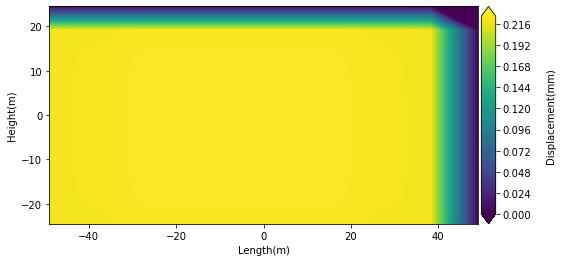

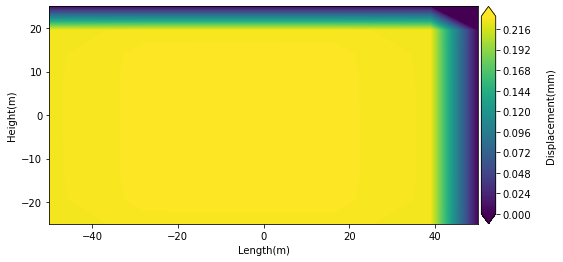

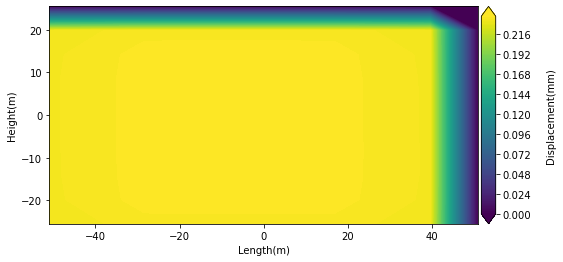

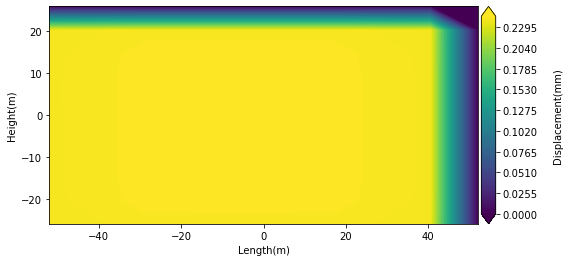

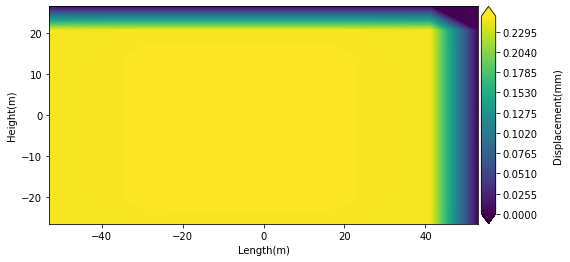

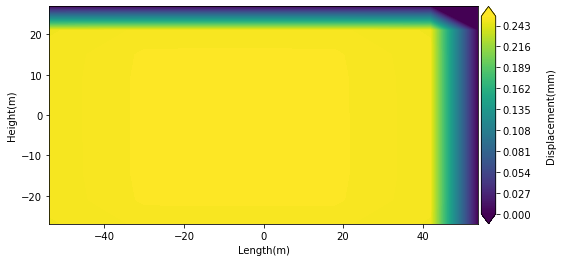

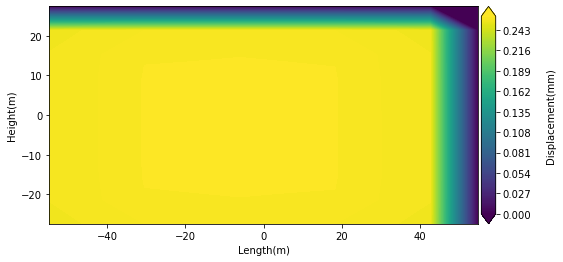

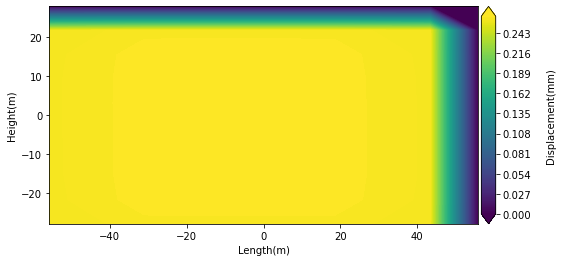

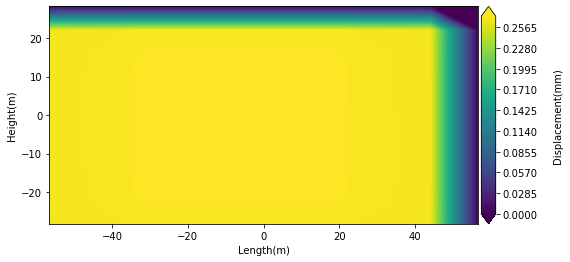

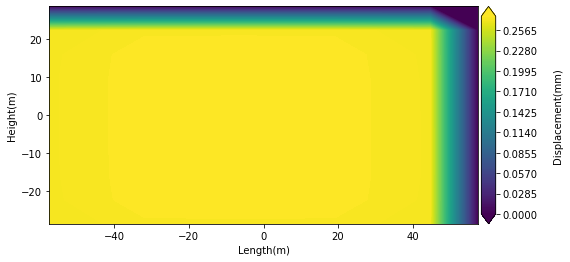

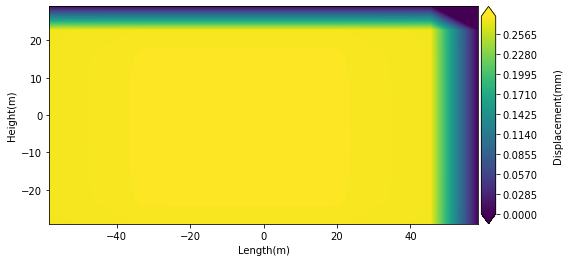

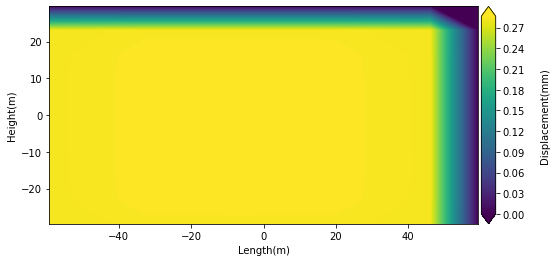

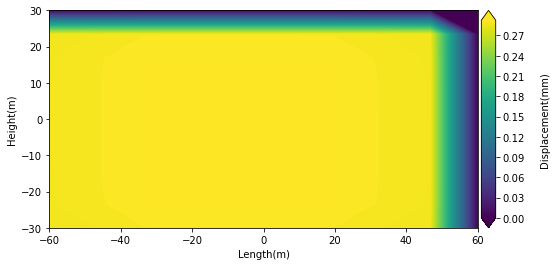

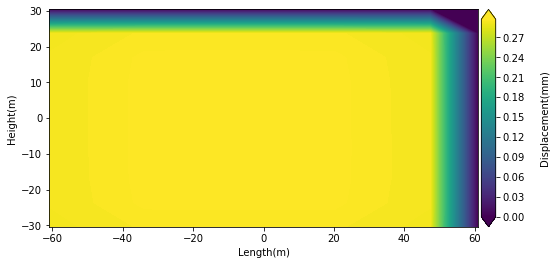

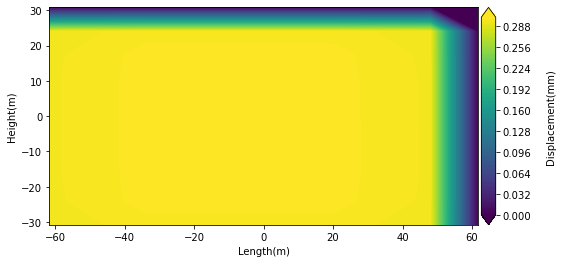

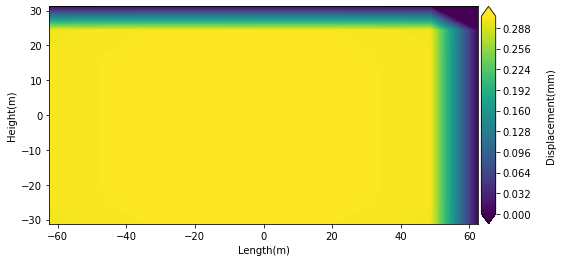

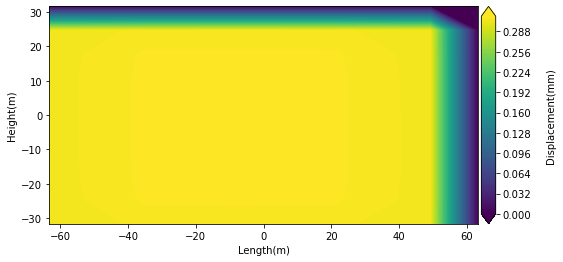

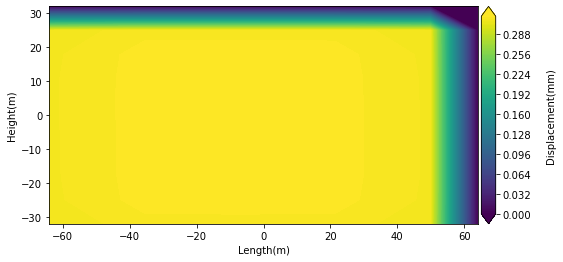

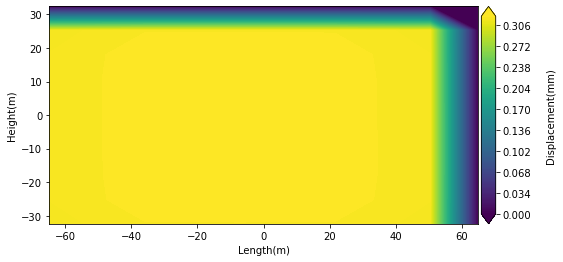

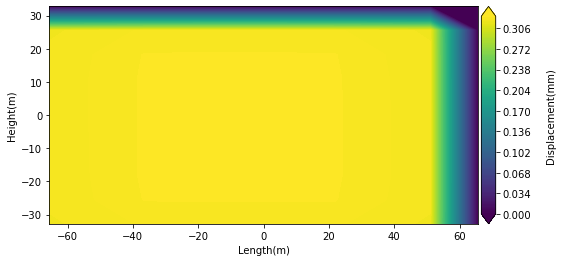

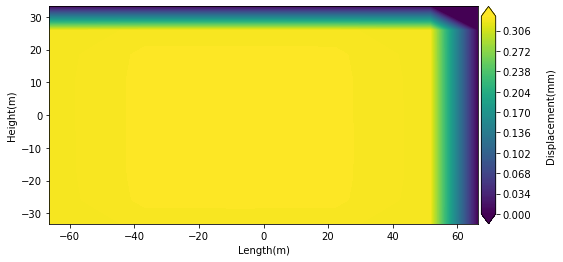

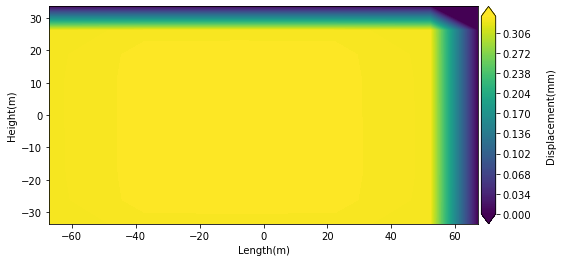

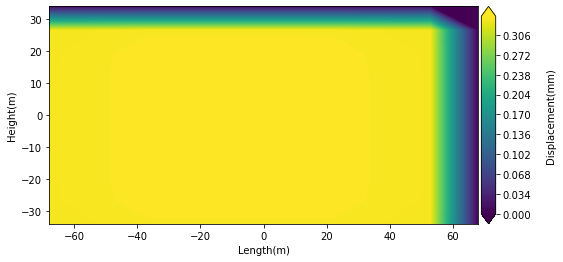

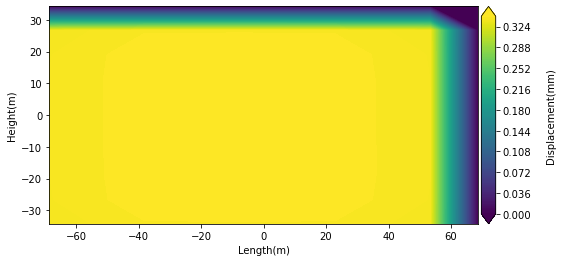

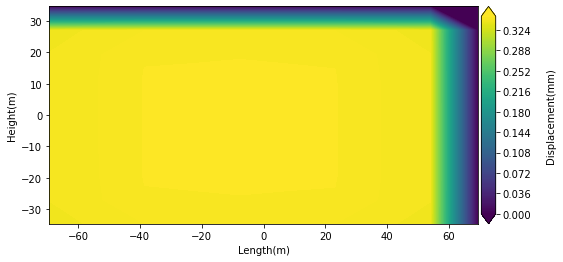

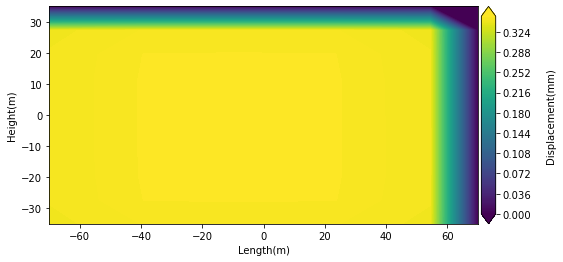

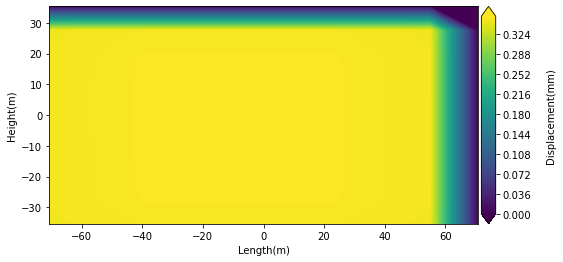

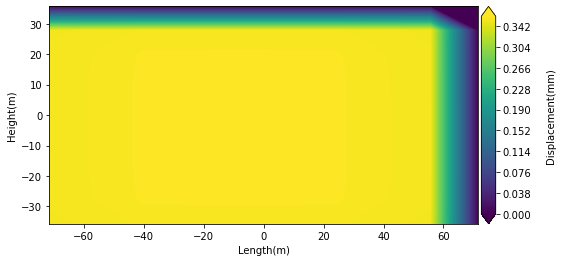

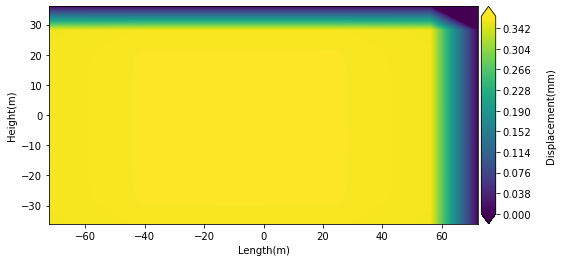

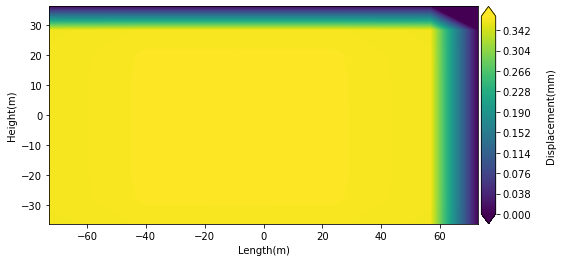

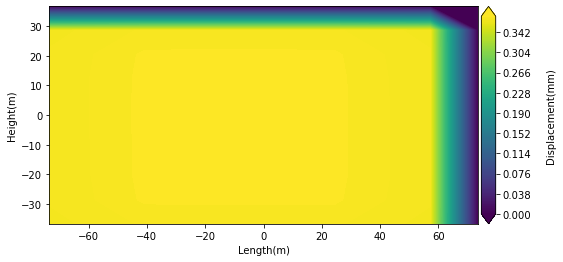

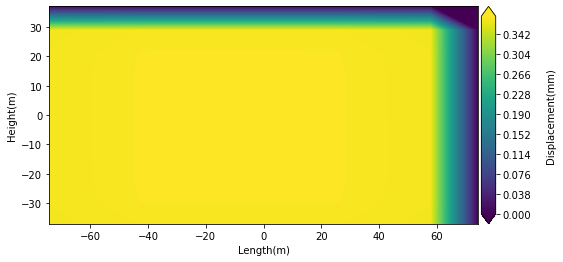

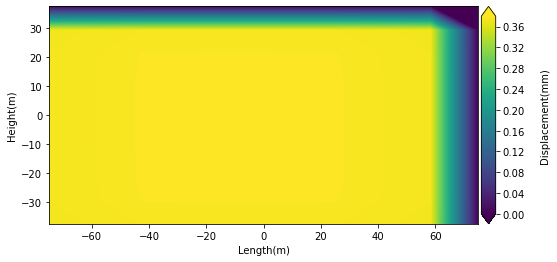

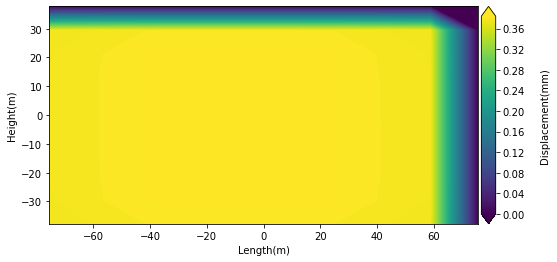

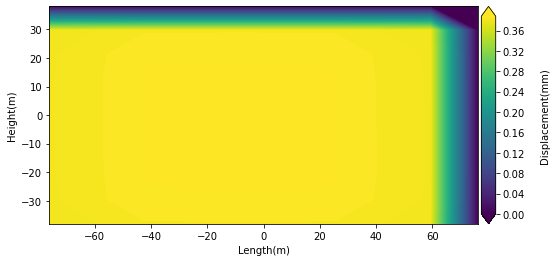

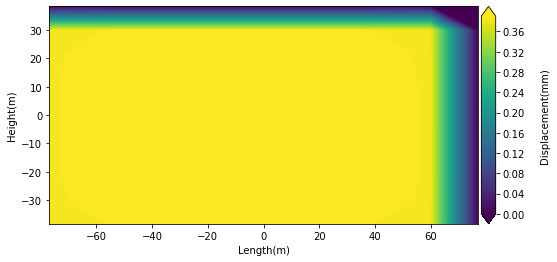

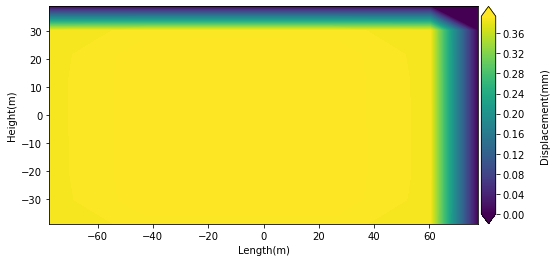

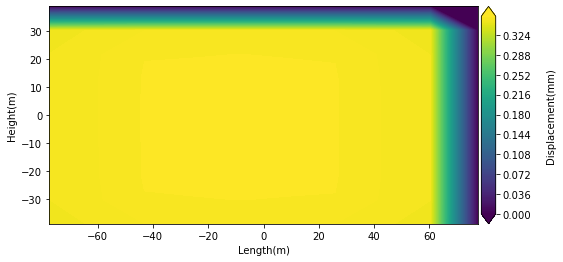

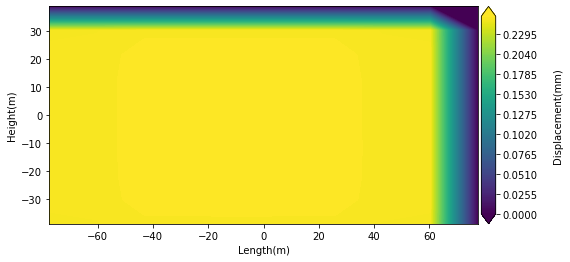

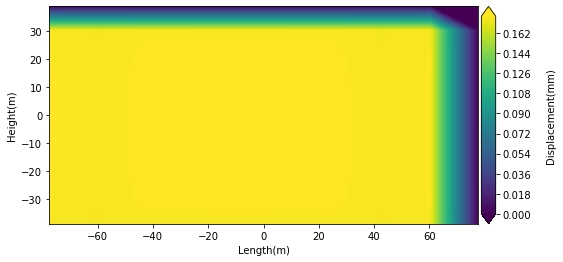

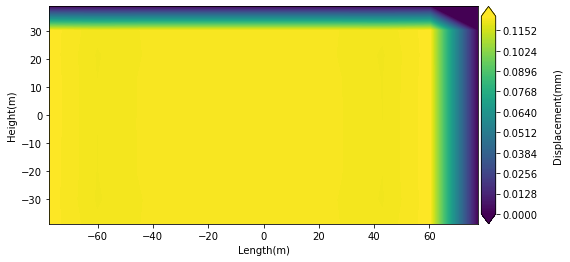

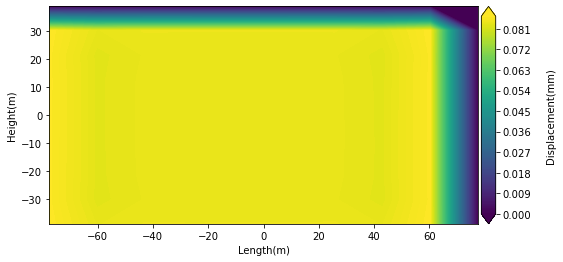

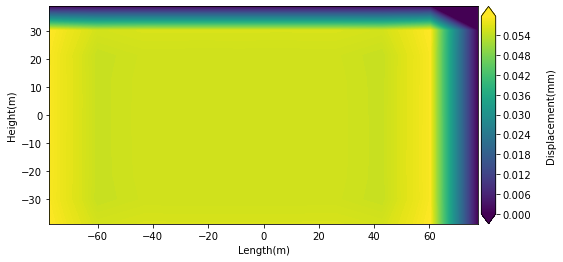

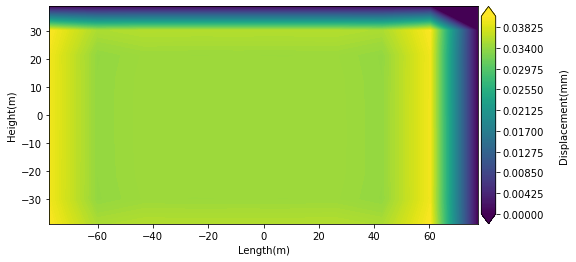

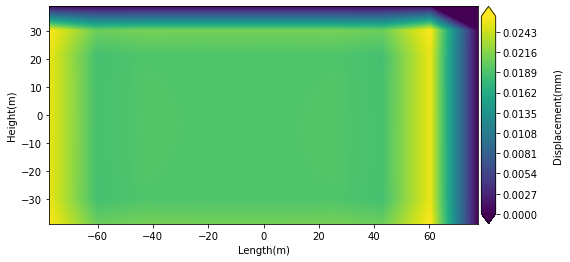

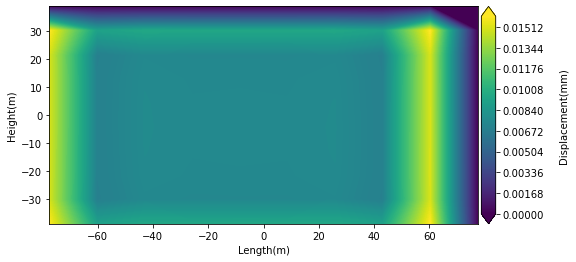

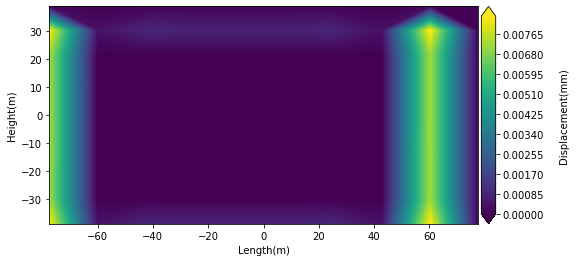

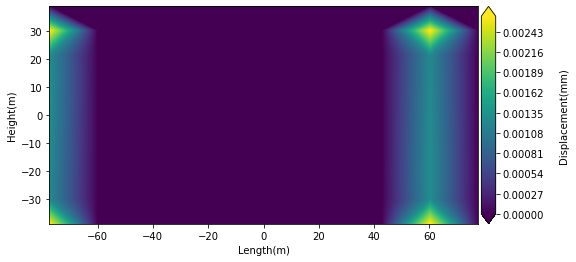

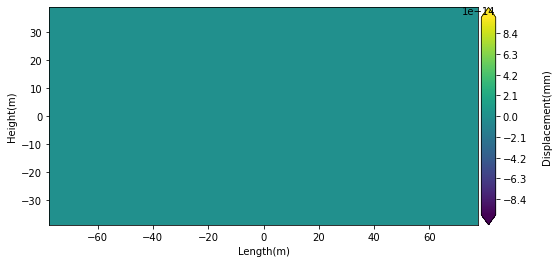

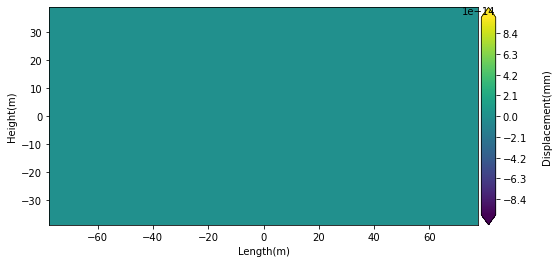

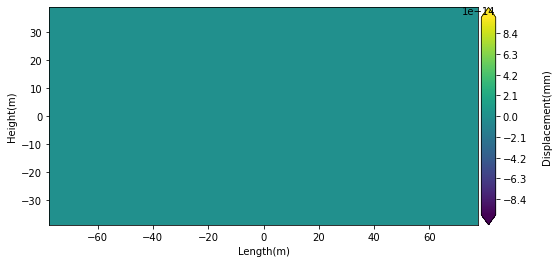

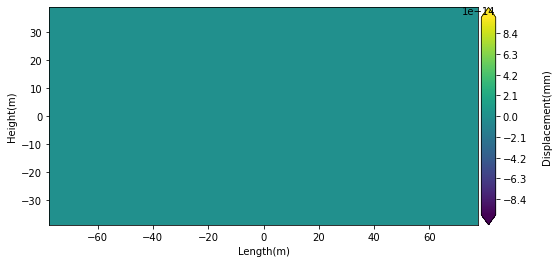

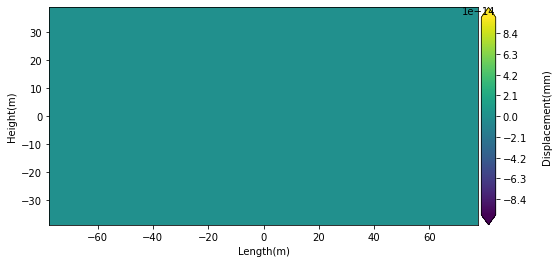

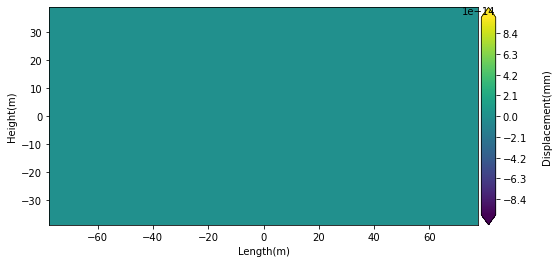

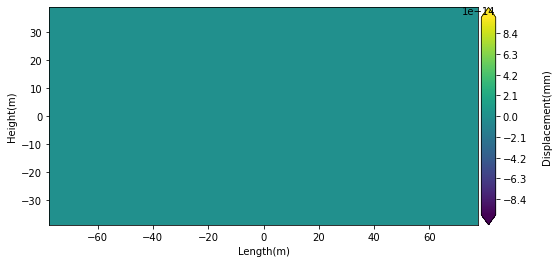

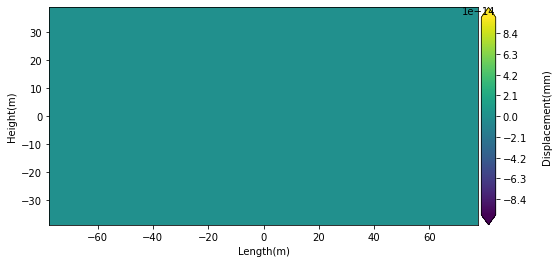

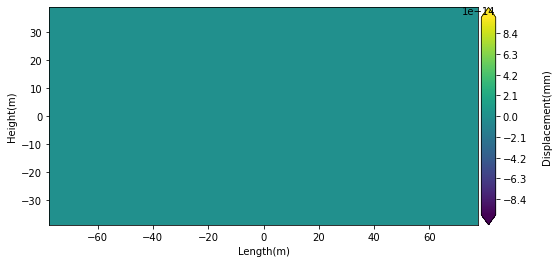

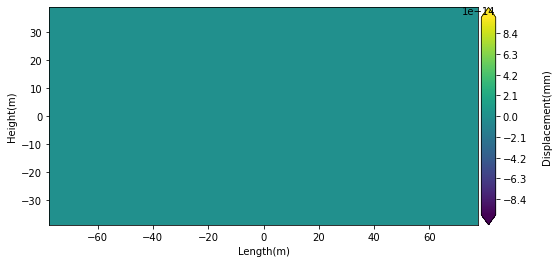

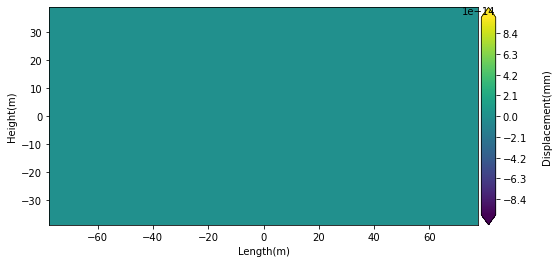

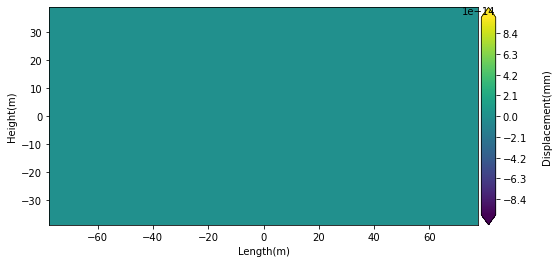

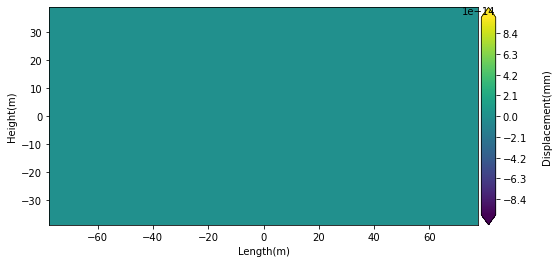

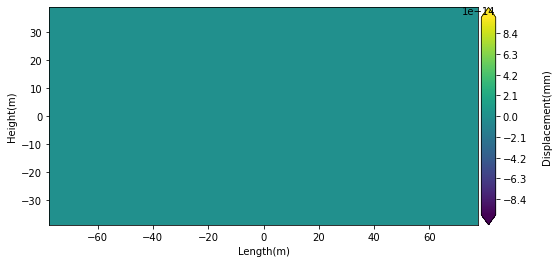

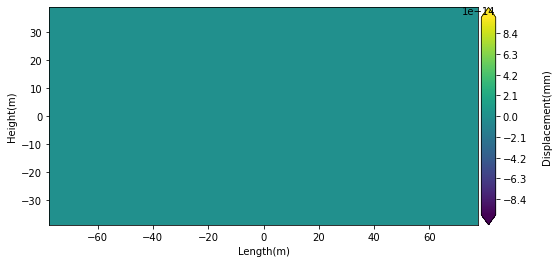

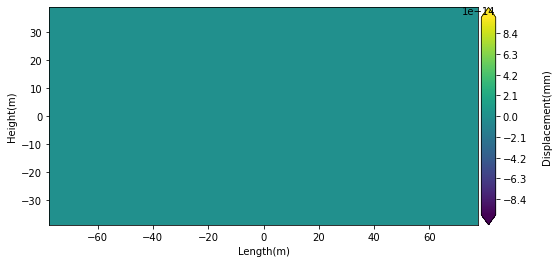

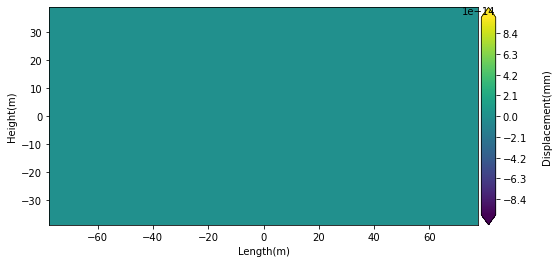

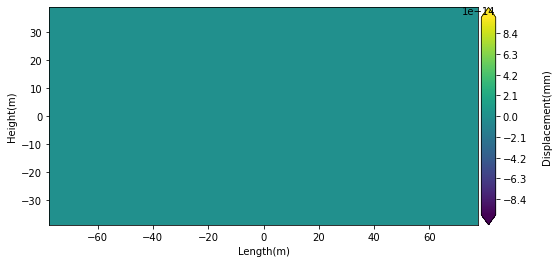

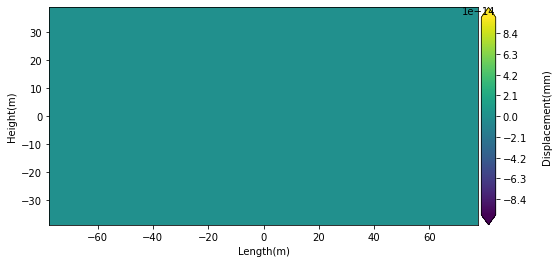

In [10]:
# oblique fracture
for i, fracture in enumerate(growing_fracture):
    ddm.fracture_plot_disp(fracture[0],tot_l_3[i],tot_h_3[i],c_x_1,c_y_1,0.0,opt=2)

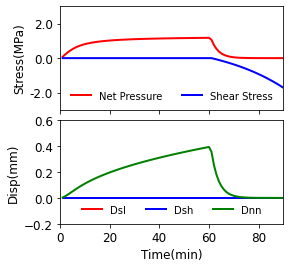

In [87]:
ddm.fracture_plot_stress_dd_time(growing_fracture,snn3,ss,c_x_1,c_y_1,0.0)

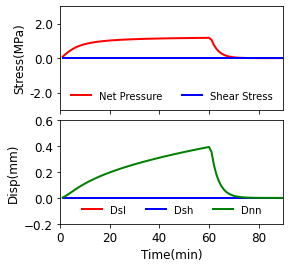

In [88]:
ss1 = np.zeros(90)
ddm.fracture_plot_stress_dd_time(growing_fracture,snn3,ss1,c_x_1,c_y_1,0.0)

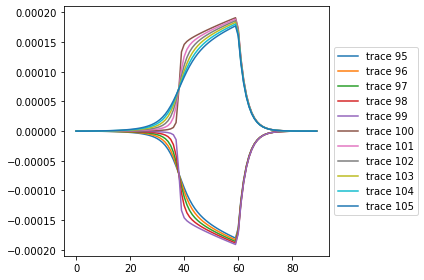

In [13]:
plt.plot(fibre4[95]['UYY'],label='trace 95')
plt.plot(fibre4[96]['UYY'],label='trace 96')
plt.plot(fibre4[97]['UYY'],label='trace 97')
plt.plot(fibre4[98]['UYY'],label='trace 98')
plt.plot(fibre4[99]['UYY'],label='trace 99')
plt.plot(fibre4[100]['UYY'],label='trace 100')
plt.plot(fibre4[101]['UYY'],label='trace 101')
plt.plot(fibre4[102]['UYY'],label='trace 102')
plt.plot(fibre4[103]['UYY'],label='trace 103')
plt.plot(fibre4[104]['UYY'],label='trace 104')
plt.plot(fibre4[105]['UYY'],label='trace 105')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

<h1>Check results and plot

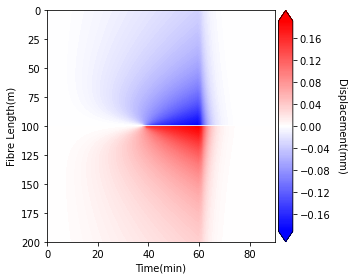

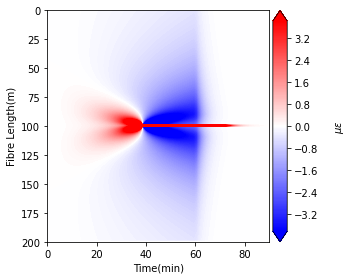

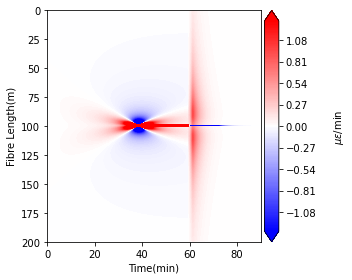

In [14]:
ddm.fibre_plot(fibre4,opt='UYY',gl=1,scale=1,figsize=(5,4))
ddm.fibre_plot(fibre4,opt='EYY_U',gl=1,scale=100,figsize=(5,4))
ddm.fibre_plot(fibre4,opt='EYY_U_Rate',gl=1,scale=100,figsize=(5,4))

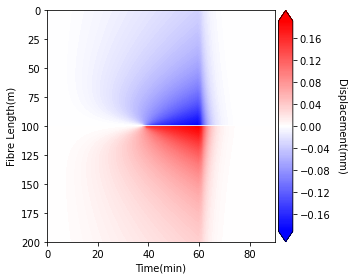

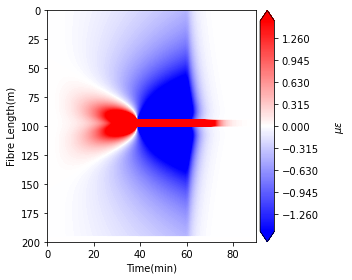

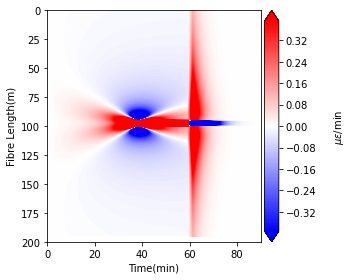

In [15]:
ddm.fibre_plot(fibre4,opt='UYY',gl=5,scale=1,figsize=(5,4))
ddm.fibre_plot(fibre4,opt='EYY_U',gl=5,scale=50,figsize=(5,4))
ddm.fibre_plot(fibre4,opt='EYY_U_Rate',gl=5,scale=50,figsize=(5,4))

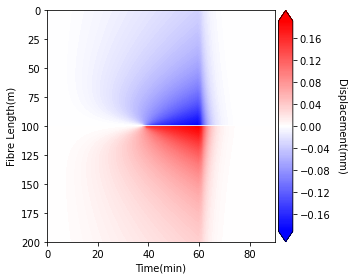

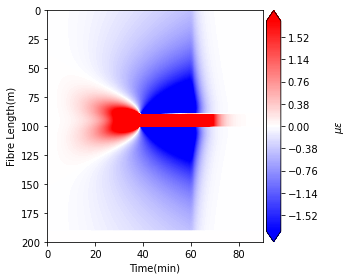

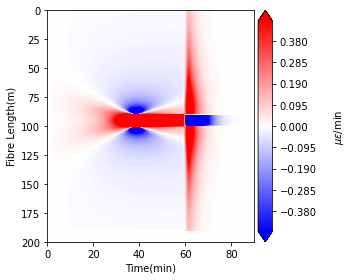

In [17]:
ddm.fibre_plot(fibre4,opt='UYY',gl=10,scale=1,figsize=(5,4))
ddm.fibre_plot(fibre4,opt='EYY_U',gl=10,scale=20,figsize=(5,4))
ddm.fibre_plot(fibre4,opt='EYY_U_Rate',gl=10,scale=20,figsize=(5,4))

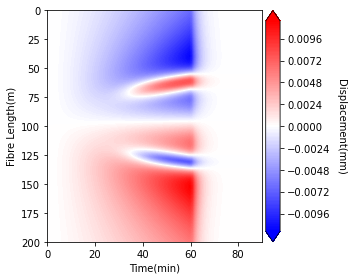

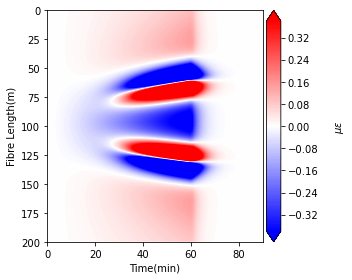

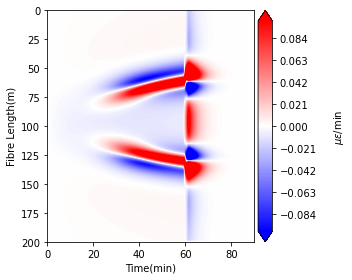

In [20]:
ddm.fibre_plot(fibre1,opt='UZZ',gl=1,scale=1,figsize=(5,4))
ddm.fibre_plot(fibre1,opt='EZZ_U',gl=1,scale=5,figsize=(5,4))
ddm.fibre_plot(fibre1,opt='EZZ_U_Rate',gl=1,scale=5,figsize=(5,4))

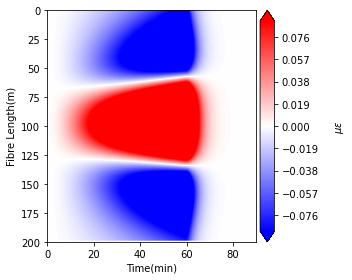

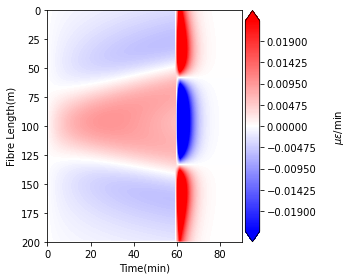

In [23]:
ddm.fibre_plot(fibre2,opt='EZZ_U',gl=1,scale=5,figsize=(5,4))
ddm.fibre_plot(fibre2,opt='EZZ_U_Rate',gl=1,scale=5,figsize=(5,4))

In [113]:
example_fractures = growing_fracture[61]

In [114]:
# ddm.cal_stress_disp(example_fractures,respara,plane_xz)
ddm.cal_stress_disp(example_fractures,respara,plane_xy)

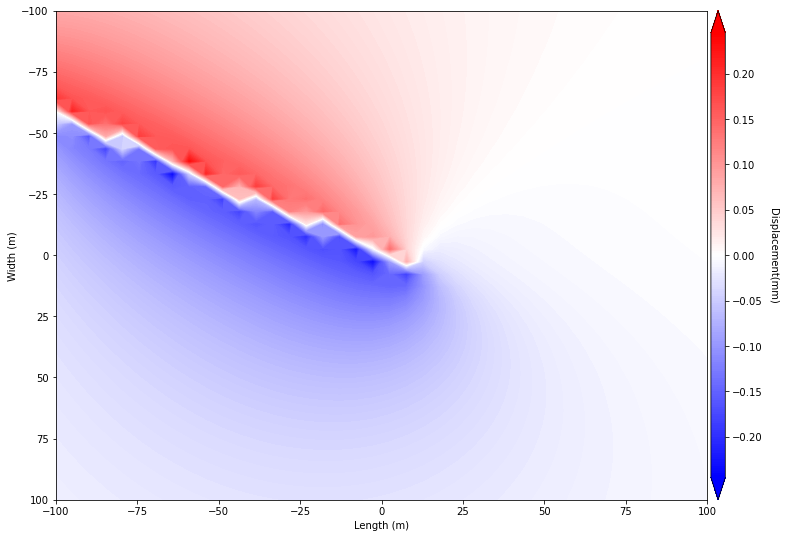

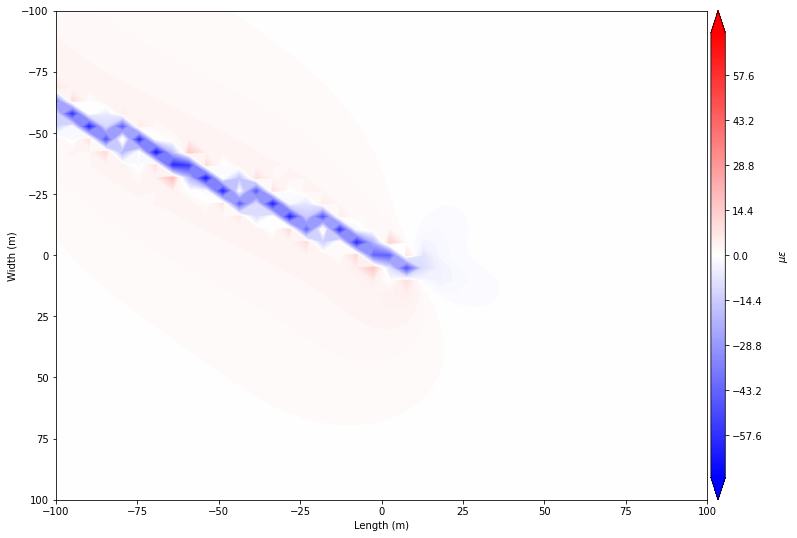

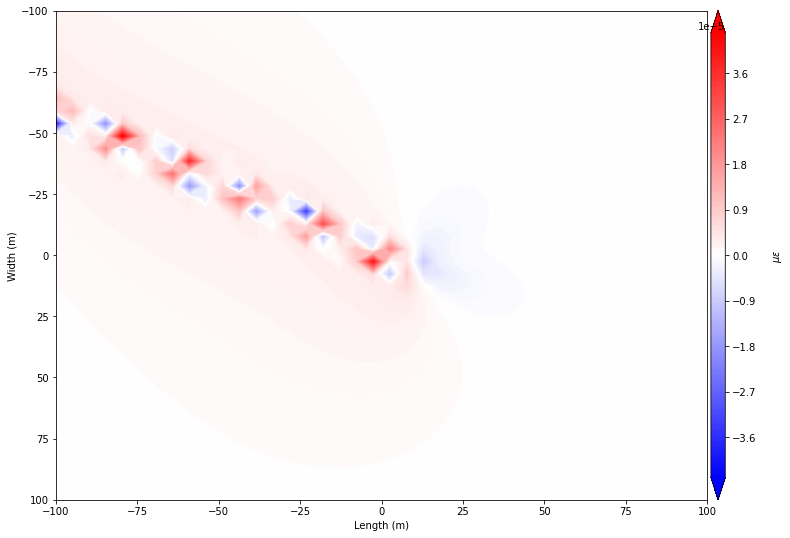

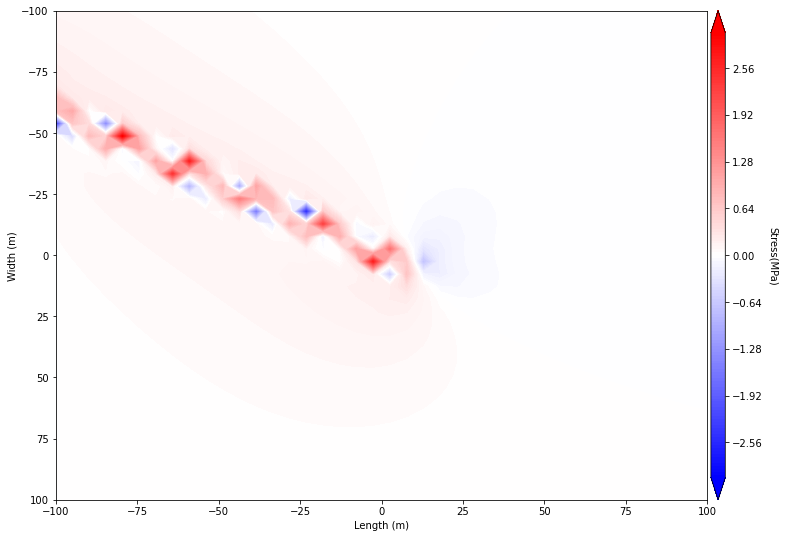

In [115]:
ddm.plane_plot(plane_xy,opt='UYY',scale=1)
ddm.plane_plot(plane_xy,opt='EYY_U',scale=1)
ddm.plane_plot(plane_xy,opt='EYY',scale=1)
ddm.plane_plot(plane_xy,opt='SYY',scale=1)